Install Libraries

In [ ]:
!pip install --upgrade speechbrain
!pip install mir_eval
!pip install -U asteroid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Generate data set

In [ ]:
from google.colab import drive
import zipfile
drive.mount('/content/drive')
zip_path = '/content/drive/MyDrive/Project/dataset_2500.zip'
with zipfile.ZipFile(zip_path, "r") as zip_ref:
  zip_ref.extractall('./dataset')
results_path = '/content/drive/MyDrive/Results.zip'
with zipfile.ZipFile(results_path, "r") as zip_ref:
  zip_ref.extractall('./convTasNet')

Mounted at /content/drive


Hparams yaml File


In [ ]:

!mkdir /content/dataset/metadata
!mkdir /content/dataset/metadata/test
!mkdir /content/dataset/metadata/train
!mkdir /content/dataset/metadata/validate
!mv /content/dataset/test/metadata.csv /content/dataset/metadata/test/
!mv /content/dataset/train/metadata.csv /content/dataset/metadata/train/
!mv /content/dataset/validate/metadata.csv /content/dataset/metadata/validate/
# !rm -rf './hparams'
!mkdir './hparams'
!cp '/content/drive/MyDrive/Project/sepformer.yml' './hparams/'
!cp -r '/content/drive/MyDrive/Project/pretrained_convtasnet' './'
!cp -r '/content/drive/MyDrive/Project/VoxLingua' './'
# !cp '/content/drive/MyDrive/Project/conVasNet.yml' './hparams/'
!cp '/content/drive/MyDrive/Project/conVasNet_p.yml' './hparams/'
!cp '/content/drive/MyDrive/Project/preprocess_dynamic_mixing.py' './'
!cp '/content/drive/MyDrive/Project/dynamic_mixing.py' './'
!cp '/content/drive/MyDrive/Project/prepare_data.py' './'
!cp -r '/content/drive/MyDrive/Project/results_80' './'
# !cp -r '/content/drive/MyDrive/Project/results' './'
# !cp -r '/content/drive/MyDrive/Project/results_200' './'
!cp '/content/drive/MyDrive/Project/conVasNet_asteroid.yml' './hparams'
!cp '/content/drive/MyDrive/Project/label_encoder.txt' './'

cp: cannot stat '/content/drive/MyDrive/Project/results_80': No such file or directory


Prepare dataset

In [ ]:
def assign_lang_label(language):
  if language =='as':
    return 'as: Assamese'

  elif language == 'bn':
    return 'bn: Bengali'

  elif language == 'en' or language == 'Indian_eng':
    return 'en: English'

  elif language == 'gu':
    return 'gu: Gujarati'

  elif language == 'hi':
    return 'hi: Hindi'

  elif language == 'kn':
    return 'kn: Kannada'

  elif language == 'ml':
    return 'ml: Malayalam'

  elif language == 'mr':
    return 'mr: Marathi'

  elif language == 'ne':
    return 'ne: Nepali'

  elif language == 'pa':
    return 'pa: Panjabi'

  elif language == 'sa':
    return 'sa: Sanskrit'

  elif language == 'sd':
    return 'sd: Sindhi'

  elif language == 'ta':
    return 'ta: Tamil'

  elif language == 'te':
    return 'te: Telugu'

  elif language == 'ur':
    return 'ur: Urdu'



def dataio_prep(hparams):
    """Creates data processing pipeline"""

    # 1. Define datasets
    train_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["train_data"],
        replacements={"data_root": hparams["data_folder"]},
    )

    valid_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["valid_data"],
        replacements={"data_root": hparams["data_folder"]},
    )

    test_data = sb.dataio.dataset.DynamicItemDataset.from_csv(
        csv_path=hparams["test_data"],
        replacements={"data_root": hparams["data_folder"]},
    )

    datasets = [train_data, valid_data, test_data]

    # 2. Provide audio pipelines

    @sb.utils.data_pipeline.takes("mix_wav")
    @sb.utils.data_pipeline.provides("mix_sig")
    def audio_pipeline_mix(mix_wav):
        mix_sig = sb.dataio.dataio.read_audio(mix_wav)
        return mix_sig

    @sb.utils.data_pipeline.takes("s1_wav")
    @sb.utils.data_pipeline.provides("s1_sig")
    def audio_pipeline_s1(s1_wav):
        s1_sig = sb.dataio.dataio.read_audio(s1_wav)
        return s1_sig

    @sb.utils.data_pipeline.takes("s2_wav")
    @sb.utils.data_pipeline.provides("s2_sig")
    def audio_pipeline_s2(s2_wav):
        s2_sig = sb.dataio.dataio.read_audio(s2_wav)
        return s2_sig

    @sb.utils.data_pipeline.takes("languages")
    @sb.utils.data_pipeline.provides("lang_id")
    def lang_id_pipeline(lang_str):
      lang_id = lang_str.split(',')
      # print(f"language String = {lang_str}, lang_id = {lang_id}")
      lang_id = [assign_lang_label(lang) for lang in lang_id]
      yield encode_languages(lang_id)

    @sb.utils.data_pipeline.takes("length")
    @sb.utils.data_pipeline.provides("lens")
    def length_pipeline(length):
      return length

    if hparams["num_spks"] == 3:

        @sb.utils.data_pipeline.takes("s3_wav")
        @sb.utils.data_pipeline.provides("s3_sig")
        def audio_pipeline_s3(s3_wav):
            s3_sig = sb.dataio.dataio.read_audio(s3_wav)
            return s3_sig

    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline_mix)
    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline_s1)
    sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline_s2)
    sb.dataio.dataset.add_dynamic_item(datasets, lang_id_pipeline)
    sb.dataio.dataset.add_dynamic_item(datasets, length_pipeline)
    if hparams["num_spks"] == 3:
      sb.dataio.dataset.add_dynamic_item(datasets, audio_pipeline_s3)
      sb.dataio.dataset.set_output_keys(datasets, ["id", "mix_sig", "s1_sig", "s2_sig", "s3_sig", "lang_id", "lens"])
    else:
      sb.dataio.dataset.set_output_keys(datasets, ["id", "mix_sig", "s1_sig", "s2_sig", "lang_id", "lens"])

    return train_data, valid_data, test_data

def encode_languages(language_list):
  label = []

  for lang in language_list:
    idx = label_encoder.encode_label(lang)
    label.append(idx)
  label = torch.tensor(label)
  # print(f"Label = {label}")
  return label

Model

In [ ]:
import csv
import os
import sys
import io

import numpy as np
import math
import torch
from  speechbrain.nnet.losses import PitWrapper
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
import matplotlib.pyplot as plt
from hyperpyyaml import load_hyperpyyaml
from tqdm import tqdm

import speechbrain as sb
import speechbrain.nnet.schedulers as schedulers
from speechbrain.utils.distributed import run_on_main
from speechbrain.utils.logger import get_logger
from speechbrain.utils.train_logger import FileTrainLogger
from speechbrain.nnet.losses import bce_loss, PitWrapper
from speechbrain.utils.metric_stats import ClassificationStats
from speechbrain.utils.Accuracy import AccuracyStats

class MultiTask(sb.Brain):
  def on_stage_start(self, stage, epoch):
    # if stage != sb.Stage.TRAIN:
      # self.error_metrics = self.hparams.error_stats()
    self.epoch_acc_p = []
    self.epoch_acc = []
    self.print_num =0;
    if stage == sb.Stage.TRAIN and epoch<21:
      self.hparams.delta_separate_loss = 1.0
      self.hparams.delta_lang_loss = 0.0
      for name in ['compute_features', 'embedding_model', 'classifier', 'mean_var_norm']:
        for param in getattr(self.modules, name).parameters():
            param.requires_grad = False
    elif stage == sb.Stage.TRAIN and epoch == 21:
      self.hparams.delta_separate_loss =0.85
      self.hparams.delta_lang_loss = 0.15
      logger.info("Unfreezing ECAPA")
      for name in ['compute_features', 'embedding_model', 'classifier', 'mean_var_norm' ]:
          for param in getattr(self.modules, name).parameters():
              param.requires_grad = True
      unfrozen_params = filter(lambda p: p.requires_grad, self.modules.parameters())
      self.optimizer = torch.optim.Adam(unfrozen_params, lr=0.00001, weight_decay=0)
    print(f"Delta lang loss = {self.hparams.delta_lang_loss}, Delta separate loss = {self.hparams.delta_separate_loss}")
    self.uttid = [0]
    if stage in [sb.Stage.VALID, sb.Stage.TEST]:
      self.valid_acc = AccuracyStats()
      self.error_metrics = self.hparams.error_stats
    self.file_logger = FileTrainLogger("/content/results/print_statements")

  def dump_waveform(self, waveform, name,  sample_rate=16000, out_dir="debug_audio"):
    os.makedirs(out_dir, exist_ok=True)

    # Save waveform
    path = os.path.join(out_dir, f"{name}.wav")
    torchaudio.save(path, waveform.unsqueeze(0).cpu(), sample_rate)
    wav = waveform
    wav = wav.detach().cpu().numpy()
    # Plot
    plt.figure(figsize=(10, 3))
    plt.plot(wav)
    plt.title(name)
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, f"{name}_{self.uttid[0]}.png"))
    plt.close()


  def compute_forward(self, mix, targets, lang_id,  stage):
    mix, mix_lens = mix
    mix, mix_lens = mix.to(self.device), mix_lens.to(self.device)
    targets = torch.stack([t.data for t in targets], dim=-1).to(self.device)
    if stage == sb.Stage.TRAIN:
      with torch.no_grad():
        if self.hparams.use_speedperturb:
            mix, targets = self.add_speed_perturb(targets, mix_lens)

            mix = targets.sum(-1)

        if self.hparams.use_wavedrop:
            mix = self.hparams.drop_chunk(mix, mix_lens)
            mix = self.hparams.drop_freq(mix)

        if self.hparams.limit_training_signal_len:
            mix, targets = self.cut_signals(mix, targets)
    #ConvTasNet
    est_source = self.modules.convTasNet(mix)
    #Making two batches
    est_source = est_source.permute(0,2,1)
    batch_size, seq_len, num_spks = est_source.shape
    est_source_permute = est_source.permute(2, 0, 1)  # Now shape is [num_spks, batch, time]
    est_source_combined = est_source_permute.reshape(batch_size * num_spks, seq_len)
    est_source_combined = est_source_combined / (est_source_combined.abs().max(dim=1, keepdim=True)[0] + 1e-8)
    mix_len_combined = mix_lens.repeat(num_spks)
    #ECAPA
    feats = self.modules.compute_features(est_source_combined)
    feats = self.modules.mean_var_norm(feats, mix_len_combined)
    embeddings = self.modules.embedding_model(feats, mix_len_combined)
    outputs = self.modules.classifier(embeddings)
    pred_lang_id = outputs.view(batch_size, num_spks, -1)
    #Check Infinite
    if torch.isnan(embeddings).any() or torch.isnan(outputs).any():
      print("Embeddings min/max:", embeddings.min(), embeddings.max())
      print(f"Embeddings: {embeddings}, Embeddings length: {embeddings.shape}")
      print("Classifier output min/max:", outputs.min(), outputs.max())
      print(f"outputs: {outputs}, outputs length: {outputs.shape}")
      print(f"pred_lang_id: {pred_lang_id}, pred_lang_id length: {pred_lang_id.shape}")
    #Print
    if self.uttid[0] % 1000 == 0:
      probs = torch.sigmoid(pred_lang_id)  # limit how often you dump
      target_lang = lang_id.squeeze(0)
      pred_lang = torch.argmax(probs, dim = -1)
      for spk_idx in range(2):
        # print(f"est_source: {est_source_combined}")
        wav = wav = est_source_combined[spk_idx]
        self.dump_waveform(wav,f"{stage}_{pred_lang[0]}_{target_lang}_12_utt{self.uttid[0]}_spk{spk_idx}")
    return est_source, targets, lang_id, mix_lens, pred_lang_id, embeddings

  def lang_accuracy(self, lang_id, pred_lang_id, log):
    # lang_id_new = lang_id.squeeze(0)
    probs = torch.sigmoid(pred_lang_id)
    targets = lang_id.data.squeeze(0).long()
    # print(f"probs = {probs}, targets = {targets}")
    # print(f"probs = {probs}, pred_lang_id {pred_lang_id}")
    # print(f"lang_id = {lang_id}")
    acc1_s = max((probs[0,targets[0]]+ probs[1,targets[1]]), (probs[0,targets[1]]+ probs[1,targets[0]]))/2
    preds = torch.argmax(pred_lang_id, dim=-1)
    # print(f"preds = {preds}")
    # targets = torch.argmax(lang_id_new, dim=-1)
    if(log):
      self.file_logger.log_stats(
          stats_meta = {
              "stage": "VALID",
              "preds": preds,
              "targets": targets,
              "probs": probs
          },verbose=False

      )
    acc1_p = int(preds[0] == targets[0]) + int(preds[1] == targets[1])
    acc2_p = int(preds[0] == targets[1]) + int(preds[1] == targets[0])
    return acc1_s, max(acc1_p, acc2_p)/2

  def compute_objectives(self, est_source, targets, lang_id, lens, pred_lang_id,stage, uttid):
    lang_id = lang_id.data.float().to(pred_lang_id.device)
    predicted_lang_id = pred_lang_id.squeeze(0)
    target = lang_id.squeeze(0).long()
    # print(f"target = {target}, pred_lang_id = {pred_lang_id}")
    separate_loss = self.hparams.loss(targets, est_source)
    lang_loss = torch.min(torch.stack([self.hparams.lang_loss(predicted_lang_id, target), self.hparams.lang_loss(predicted_lang_id,target.flip(0))]))
    loss = self.hparams.delta_lang_loss*lang_loss + self.hparams.delta_separate_loss*separate_loss
    return loss,lang_loss,separate_loss

  def fit_batch(self,batch):
    mixture = batch.mix_sig
    targets = [batch.s1_sig, batch.s2_sig]
    lang_id = batch.lang_id.data
    self.uttid[0] = self.uttid[0] + 1
    with torch.amp.autocast(device_type='cuda', enabled=False):
      est_source, targets, lang_id, lens, pred_lang_id,embeddings = self.compute_forward(
        mixture, targets, lang_id, sb.Stage.TRAIN
      )
      # print(f"predictions: {pred_lang_id}, targets: {targets}")
      loss,lang_loss,separate_loss = self.compute_objectives(
        est_source, targets, lang_id, lens, pred_lang_id,sb.Stage.TRAIN, self.uttid
      )
      if self.uttid[0]%1000 == 0:
        self.file_logger.log_stats(stats_meta={
            "stage": "Train",
            "Loss":loss,
            "Lang loss":lang_loss,
            "separate loss":separate_loss,
            "Est_source" :est_source,
            "targets": targets,
            "lang_id":lang_id,
            "lens":lens,
            "pred_lang_id":pred_lang_id}, verbose=False)

      # print(f"loss: {loss}")
      if self.hparams.threshold_byloss:
        th = self.hparams.threshold
        loss = loss[loss > th]
        if loss.nelement() > 0:
            loss = loss.mean()
            lang_loss = lang_loss.mean()
            separate_loss = separate_loss.mean()
      else:
        loss = loss.mean()
        lang_loss = lang_loss.mean()
        separate_loss = separate_loss.mean()

    if loss.nelement() > 0 and loss < self.hparams.loss_upper_lim:
      self.scaler.scale(loss).backward()
      if self.hparams.clip_grad_norm >= 0:
        self.scaler.unscale_(self.optimizer)
        torch.nn.utils.clip_grad_norm_(
          self.modules.parameters(),
          self.hparams.clip_grad_norm,
        )
      self.scaler.step(self.optimizer)
      self.scaler.update()
    else:
      self.nonfinite_count += 1
      logger.info(
        "infinite loss or empty loss! it happened {} times so far - skipping this batch".format(
          self.nonfinite_count
        )
      )
      loss.data = torch.tensor(0.0).to(self.device)
      lang_loss.data = torch.tensor(0.0).to(self.device)
      separate_loss.data = torch.tensor(0.0).to(self.device)
    self.optimizer.zero_grad()

    return loss.detach().cpu()


  def evaluate_batch(self, batch, stage):

    """Computations needed for validation/test batches"""
    snt_id = batch.id
    mixture = batch.mix_sig
    targets = [batch.s1_sig, batch.s2_sig]
    lang_id = batch.lang_id.data
    self.uttid[0] = self.uttid[0] + 1
    if self.hparams.num_spks == 3:
      targets.append(batch.s3_sig)

    with torch.no_grad():
      # compute_forward returns multiple values for multi-task
      est_source, targets, lang_id, lens, pred_lang_id, embeddings = self.compute_forward(
        mixture, targets, lang_id,  stage
      )
      # compute_objectives combines both tasks into a single loss
      loss,lang_loss,separate_loss = self.compute_objectives(
        est_source, targets, lang_id, lens, pred_lang_id, stage, self.uttid
      )
      lang_id = lang_id.data.float().to(pred_lang_id.device)
      if(self.uttid[0]%20 ==0):
        log_valid = True
      else:
        log_valid = False
      # self.accuracy.append(pred_lang_id, lang_id.unsqueeze(1), lens)
      for i in range(0,self.hparams.batch_size):
        lang_acc_s,lang_acc_p = self.lang_accuracy(lang_id[i],pred_lang_id[i].squeeze(0),log_valid)
        self.epoch_acc.append(lang_acc_s)
        self.epoch_acc_p.append(lang_acc_p)
    if stage == sb.Stage.TEST and self.hparams.save_audio:

      if hasattr(self.hparams, "n_audio_to_save"):
        if self.hparams.n_audio_to_save > 0:
          self.save_audio(snt_id[0], mixture, targets, est_source)
          self.hparams.n_audio_to_save += -1
      else:
        self.save_audio(snt_id[0], mixture, targets, est_source)


    return loss.mean().detach()

  def on_stage_end(self, stage, stage_loss, epoch):
    stage_stats = {"final_loss": stage_loss}
    if stage == sb.Stage.TRAIN:
      self.train_stats = stage_stats
      # train_loss.append(self.train_stats["final_loss"])
      file_loc = f"/content/results_{epoch}"
      if(epoch%20 ==0):
        os.rename(r"/content/results", file_loc)
        !cp -r $file_loc '/content/drive/MyDrive/Project'
        if(epoch > 20):
          prev_file_loc = f"/content/drive/MyDrive/Project/results_{epoch-20}"
          !rm -rf $prev_file_loc
          logger.info(f"Removed file {prev_file_loc}")
        os.rename(file_loc,r"/content/results")
        logger.info("Saved file succesfully")
    accuracy_soft = torch.tensor(self.epoch_acc)
    accuracy_partial = torch.tensor(self.epoch_acc_p)
    if stage == sb.Stage.VALID:
      if isinstance(self.hparams.lr_scheduler, schedulers.ReduceLROnPlateau):
        current_lr, next_lr = self.hparams.lr_scheduler(
            [self.optimizer], epoch, stage_loss
        )
        schedulers.update_learning_rate(self.optimizer, next_lr)
      else:
        # if we do not use the reducelronplateau, we do not change the lr
        current_lr = self.hparams.optimizer.optim.param_groups[0]["lr"]

      self.hparams.train_logger.log_stats(
          stats_meta={"epoch": epoch, "lr": current_lr},
          train_stats=self.train_stats,
          valid_stats={"final_loss": stage_loss,"Accuracy soft": accuracy_soft.mean(), "Accuracy Partial" : accuracy_partial.mean()}
      )
      self.checkpointer.save_and_keep_only(
          meta={"final_loss": stage_stats["final_loss"]}, min_keys=["final_loss"]
      )
    elif stage == sb.Stage.TEST:
      self.hparams.train_logger.log_stats(
        stats_meta={"Epoch loaded": self.hparams.epoch_counter.current},
        test_stats={"final_loss": stage_loss, "Accuracy soft": accuracy_soft.mean(), "Accuracy Partial" : accuracy_partial.mean()},
      )

  def add_speed_perturb(self, targets, targ_lens):
    """Adds speed perturbation and random_shift to the input signals"""

    min_len = -1
    recombine = False

    if self.hparams.use_speedperturb or self.hparams.use_rand_shift:
      # Performing speed change (independently on each source)
      new_targets = []
      recombine = True

      for i in range(targets.shape[-1]):
        new_target = self.hparams.speed_perturb(targets[:, :, i])
        new_targets.append(new_target)
        if i == 0:
          min_len = new_target.shape[-1]
        else:
          if new_target.shape[-1] < min_len:
            min_len = new_target.shape[-1]

      if self.hparams.use_rand_shift:
        # Performing random_shift (independently on each source)
        recombine = True
        for i in range(targets.shape[-1]):
            rand_shift = torch.randint(
                self.hparams.min_shift, self.hparams.max_shift, (1,)
            )
            new_targets[i] = new_targets[i].to(self.device)
            new_targets[i] = torch.roll(
                new_targets[i], shifts=(rand_shift[0],), dims=1
            )

        # Re-combination
        if recombine:
            if self.hparams.use_speedperturb:
                targets = torch.zeros(
                    targets.shape[0],
                    min_len,
                    targets.shape[-1],
                    device=targets.device,
                    dtype=torch.float,
                )
            for i, new_target in enumerate(new_targets):
                targets[:, :, i] = new_targets[i][:, 0:min_len]

    mix = targets.sum(-1)
    return mix, targets

  def cut_signals(self, mixture, targets):
      """This function selects a random segment of a given length within the mixture.
      The corresponding targets are selected accordingly"""
      randstart = torch.randint(
          0,
          1 + max(0, mixture.shape[1] - self.hparams.training_signal_len),
          (1,),
      ).item()
      targets = targets[
          :, randstart : randstart + self.hparams.training_signal_len, :
      ]
      mixture = mixture[
          :, randstart : randstart + self.hparams.training_signal_len
      ]
      return mixture, targets


  def reset_layer_recursively(self, layer):
      """Reinitializes the parameters of the neural networks"""
      if hasattr(layer, "reset_parameters"):
          layer.reset_parameters()
      for child_layer in layer.modules():
          if layer != child_layer:
              self.reset_layer_recursively(child_layer)

  def save_results(self, test_data):

    """This script computes the SDR and SI-SNR metrics and saves
    them into a csv file"""

    # This package is required for SDR computation
    from mir_eval.separation import bss_eval_sources

    # Create folders where to store audio
    save_file = os.path.join(self.hparams.output_folder, "test_results.csv")

    # Variable init
    all_sdrs = []
    all_sdrs_i = []
    all_sisnrs = []
    all_sisnrs_i = []
    csv_columns = ["snt_id", "sdr", "sdr_i", "si-snr", "si-snr_i"]

    test_loader = sb.dataio.dataloader.make_dataloader(
      test_data, **self.hparams.dataloader_opts
    )

    with open(save_file, "w", newline="", encoding="utf-8") as results_csv:
      writer = csv.DictWriter(results_csv, fieldnames=csv_columns)
      writer.writeheader()

      # Loop over all test sentence
      with tqdm(test_loader, dynamic_ncols=True) as t:
          for i, batch in enumerate(t):
            # Apply Separation
            mixture, mix_len = batch.mix_sig
            snt_id = batch.id
            targets = [batch.s1_sig, batch.s2_sig]
            lang_id = batch.lang_id
            # lens = batch.lens
            self.uttid[0] = self.uttid[0] + 1
            if self.hparams.num_spks == 3:
              targets.append(batch.s3_sig)

            with torch.no_grad():
              predictions, targets, lang_id, lens, pred_lang_id, embeddings = self.compute_forward(
                  batch.mix_sig, targets, lang_id,  sb.Stage.TEST
              )

            # Compute SI-SNR
            total_loss,lang_loss,sisnr = self.compute_objectives(predictions, targets,lang_id,lens,pred_lang_id, sb.Stage.TEST, self.uttid)

            # Compute SI-SNR improvement
            mixture_signal = torch.stack(
              [mixture] * self.hparams.num_spks, dim=-1
            )
            mixture_signal = mixture_signal.to(targets.device)
            total_loss,lang_loss,sisnr_baseline = self.compute_objectives(
              mixture_signal, targets, lang_id, lens, pred_lang_id, sb.Stage.TEST, self.uttid
            )
            sisnr_i = sisnr - sisnr_baseline

            # Compute SDR
            ref = targets[0].t().cpu().numpy()
            est = predictions[0].t().detach().cpu().numpy()
            if np.any(np.all(ref == 0, axis=1)):
              print(f"Skipping uttid: {self.uttid[0]} as all the targets are zero")
              continue
            sdr, _, _, _ = bss_eval_sources(ref,est)

            sdr_baseline, _, _, _ = bss_eval_sources(ref,est)


            sdr_i = sdr.mean() - sdr_baseline.mean()

            # Saving on a csv file
            row = {
              "snt_id": snt_id[0],
              "sdr": sdr.mean(),
              "sdr_i": sdr_i,
              "si-snr": -sisnr.item(),
              "si-snr_i": -sisnr_i.item(),
            }
            writer.writerow(row)

            # Metric Accumulation
            all_sdrs.append(sdr.mean())
            all_sdrs_i.append(sdr_i.mean())
            all_sisnrs.append(-sisnr.item())
            all_sisnrs_i.append(-sisnr_i.item())

          row = {
            "snt_id": "avg",
            "sdr": np.array(all_sdrs).mean(),
            "sdr_i": np.array(all_sdrs_i).mean(),
            "si-snr": np.array(all_sisnrs).mean(),
            "si-snr_i": np.array(all_sisnrs_i).mean(),
          }
          writer.writerow(row)

    logger.info("Mean SISNR is {}".format(np.array(all_sisnrs).mean()))
    logger.info("Mean SISNRi is {}".format(np.array(all_sisnrs_i).mean()))
    logger.info("Mean SDR is {}".format(np.array(all_sdrs).mean()))
    logger.info("Mean SDRi is {}".format(np.array(all_sisnrs_i).mean()))

  def save_audio(self, snt_id, mixture, targets, predictions):
    "saves the test audio (mixture, targets, and estimated sources) on disk"

    # Create output folder
    save_path = os.path.join(self.hparams.save_folder, "audio_results")
    if not os.path.exists(save_path):
      os.mkdir(save_path)

    for ns in range(self.hparams.num_spks):
      # Estimated source
      signal = predictions[0, :, ns]
      signal = signal / signal.abs().max()
      save_file = os.path.join(
        save_path, "item{}_source{}hat.wav".format(snt_id, ns + 1)
      )
      torchaudio.save(
        save_file, signal.unsqueeze(0).cpu(), self.hparams.sample_rate
      )

      # Original source
      signal = targets[0, :, ns]
      signal = signal / signal.abs().max()
      save_file = os.path.join(
        save_path, "item{}_source{}.wav".format(snt_id, ns + 1)
      )
      torchaudio.save(
        save_file, signal.unsqueeze(0).cpu(), self.hparams.sample_rate
      )

    # Mixture
    signal = mixture[0][0, :]
    signal = signal / signal.abs().max()
    save_file = os.path.join(save_path, "item{}_mix.wav".format(snt_id))
    torchaudio.save(
      save_file, signal.unsqueeze(0).cpu(), self.hparams.sample_rate
    )
  # def get_language(path):
  #   mixture = sb.dataio.dataio.read_audio(torchaudio.load())


Main

In [ ]:
# Load hyperparameters file with command-line overrides
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import torch
torch.cuda.empty_cache()
args = ["/content/hparams/conVasNet_asteroid.yml"]
hparams_file, run_opts, overrides = sb.parse_arguments(args)


epochs = 200
with open(hparams_file, encoding="utf-8") as fin:
  hparams = load_hyperpyyaml(fin, overrides)

# Initialize ddp (useful only for multi-GPU DDP training)
sb.utils.distributed.ddp_init_group(run_opts)

# Logger info
logger = get_logger(__name__)

# Create experiment directory
sb.create_experiment_directory(
  experiment_directory=hparams["output_folder"],
  hyperparams_to_save=hparams_file,
  overrides=overrides,
)

# Update precision to bf16 if the device is CPU and precision is fp16
if run_opts.get("device") == "cpu" and hparams.get("precision") == "fp16":
  hparams["precision"] = "bf16"

# Check if wsj0_tr is set with dynamic mixing
if hparams["dynamic_mixing"] and not os.path.exists(hparams["base_folder_dm"]):
  raise ValueError("Please, specify a valid base_folder_dm folder when using dynamic mixing")

import sys
sys.path.append('/content/')

label_encoder = hparams["label_encoder"]
label_encoder.expect_len(107) #new Line Added
label_encoder.load('/content/label_encoder.txt')
# Data preparation
from prepare_data import prepare_wsjmix  # noqa

run_on_main(
    prepare_wsjmix,
    kwargs={
        "datapath": hparams["data_folder"],
        "savepath": hparams["save_folder"],
        "n_spks": hparams["num_spks"],
        "skip_prep": hparams["skip_prep"],
        "fs": hparams["sample_rate"],
    },
)

# Create dataset objects
if hparams["dynamic_mixing"]:
    from dynamic_mixing import dynamic_mix_data_prep

    # if the base_folder for dm is not processed, preprocess them
    if "processed" not in hparams["base_folder_dm"]:
        # if the processed folder already exists we just use it otherwise we do the preprocessing
        if not os.path.exists(
            os.path.normpath(hparams["base_folder_dm"]) + "_processed"
        ):
            from preprocess_dynamic_mixing import resample_folder

            print("Resampling the base folder")
            run_on_main(
                resample_folder,
                kwargs={
                    "input_folder": hparams["base_folder_dm"],
                    "output_folder": os.path.normpath(
                        hparams["base_folder_dm"]
                    )
                    + "_processed",
                    "fs": hparams["sample_rate"],
                    "regex": "**/*.wav",
                },
            )
            # adjust the base_folder_dm path
            hparams["base_folder_dm"] = (
                os.path.normpath(hparams["base_folder_dm"]) + "_processed"
            )
        else:
            print(
                "Using the existing processed folder on the same directory as base_folder_dm"
            )
            hparams["base_folder_dm"] = (
                os.path.normpath(hparams["base_folder_dm"]) + "_processed"
            )

    # Collecting the hparams for dynamic batching
    dm_hparams = {
        "train_data": hparams["train_data"],
        "data_folder": hparams["data_folder"],
        "base_folder_dm": hparams["base_folder_dm"],
        "sample_rate": hparams["sample_rate"],
        "num_spks": hparams["num_spks"],
        "training_signal_len": hparams["training_signal_len"],
        "dataloader_opts": hparams["dataloader_opts"],
    }
    train_data = dynamic_mix_data_prep(dm_hparams)
    _, valid_data, test_data = dataio_prep(hparams)
else:
    train_data, valid_data, test_data = dataio_prep(hparams)

trainfile_test,sr = torchaudio.load("/content/dataset/train/mix/Indian_eng_as_9000.wav")

logger.info(f"Train sampling rate:{sr}")

# Load pretrained model if pretrained_separator is present in the yaml
# if "pretrained_separator" in hparams:
#     run_on_main(hparams["pretrained_separator"].collect_files, kwargs={"default_source": "speechbrain/sepformer-wsj02mix"})
#     hparams["pretrained_separator"].load_collected()

# Brain class initialization
separator = MultiTask(
    modules=hparams["modules"],
    opt_class=hparams["optimizer"],
    hparams=hparams,
    run_opts=run_opts,
    checkpointer=hparams["checkpointer"],
)




# re-initialize the parameters if we don't use a pretrained model
if "pretrained_separator" not in hparams:
  for module in separator.modules.values():
      separator.reset_layer_recursively(module)
else:
  logger.info(f"Loading pretrained weights:{separator}")
  pretrain = hparams["pretrained_separator"]
  pretrain.collect_files()
  pretrain.load_collected()

separator.modules.convTasNet.load_state_dict(torch.load('/content/convTasNet/Results/04-02-2024/model_state_dict(2).pt'))


separator.fit(
    separator.hparams.epoch_counter,
    train_data,
    valid_data,
    train_loader_kwargs=hparams["dataloader_opts"],
    valid_loader_kwargs=hparams["dataloader_opts"],
)

INFO:speechbrain.utils.seed:Setting seed to 1234
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load_if_possible
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/convtasnet/1234
Creating a csv file for a custom dataset
__main__ - Train sampling rate:16000
speechbrain.core - Info: precision arg from hparam file is used
speechbrain.core - Info: noprogressbar arg from hparam file is used
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`
speechbrain.core - MultiTask Model Statistics:
* Total Number of Trainable Parameters: 26.3M
* Total Number of Parameters: 26.3M
* Trainable Parameters represent 100.0000% of the total size.
__main__ - Loading pretrained weights:<__main__.MultiTask object at 0x7fb795bd89d0>

embedding_model.ckpt:   0%|          | 0.00/84.5M [00:00<?, ?B/s]

speechbrain.utils.fetching - Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/lang-id-voxlingua107-ecapa' if not cached


classifier.ckpt:   0%|          | 0.00/763k [00:00<?, ?B/s]

speechbrain.utils.fetching - Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/lang-id-voxlingua107-ecapa' if not cached


label_encoder.txt: 0.00B [00:00, ?B/s]

speechbrain.utils.parameter_transfer - Loading pretrained files for: embedding_model, classifier, label_encoder
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.utils.checkpoints - Would load a checkpoint here, but none found yet.
speechbrain.utils.epoch_loop - Going into epoch 1
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 1250/1250 [02:38<00:00,  7.89it/s, train_loss=-10.7]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:22<00:00, 22.71it/s]

speechbrain.utils.train_logger - epoch: 1, lr: 1.50e-03 - train final_loss: -1.07e+01 - valid final_loss: -1.13e+01, valid Accuracy soft: 0.27113109827041626, valid Accuracy Partial: 0.5460000038146973


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-05-37+00
speechbrain.utils.epoch_loop - Going into epoch 2
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 1250/1250 [02:21<00:00,  8.84it/s, train_loss=-11.9]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.05it/s]

speechbrain.utils.train_logger - epoch: 2, lr: 1.50e-03 - train final_loss: -1.19e+01 - valid final_loss: -1.12e+01, valid Accuracy soft: 0.2690316140651703, valid Accuracy Partial: 0.5440000295639038


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-08-20+00
speechbrain.utils.epoch_loop - Going into epoch 3
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 1250/1250 [02:22<00:00,  8.80it/s, train_loss=-12.5]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.15it/s]

speechbrain.utils.train_logger - epoch: 3, lr: 1.50e-03 - train final_loss: -1.25e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2676689922809601, valid Accuracy Partial: 0.5419999957084656


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-11-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-08-20+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-05-37+00
speechbrain.utils.epoch_loop - Going into epoch 4
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.35it/s, train_loss=-13.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.80it/s, train_loss=-13.1]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.01it/s]

speechbrain.utils.train_logger - epoch: 4, lr: 1.50e-03 - train final_loss: -1.31e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2675919532775879, valid Accuracy Partial: 0.5360000133514404


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-13-46+00
speechbrain.utils.epoch_loop - Going into epoch 5
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 1250/1250 [02:22<00:00,  8.80it/s, train_loss=-13.6]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.13it/s]

speechbrain.utils.train_logger - epoch: 5, lr: 1.50e-03 - train final_loss: -1.36e+01 - valid final_loss: -1.17e+01, valid Accuracy soft: 0.2713228762149811, valid Accuracy Partial: 0.5479999780654907


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-16-29+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-11-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-13-46+00
speechbrain.utils.epoch_loop - Going into epoch 6
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:18<00:04,  8.89it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.78it/s, train_loss=-14]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.01it/s]

speechbrain.utils.train_logger - epoch: 6, lr: 1.50e-03 - train final_loss: -1.40e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.26669564843177795, valid Accuracy Partial: 0.5400000214576721


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-19-13+00
speechbrain.utils.epoch_loop - Going into epoch 7
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.42it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.82it/s, train_loss=-14.2]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.95it/s]

speechbrain.utils.train_logger - epoch: 7, lr: 1.50e-03 - train final_loss: -1.42e+01 - valid final_loss: -1.17e+01, valid Accuracy soft: 0.2624993920326233, valid Accuracy Partial: 0.5299999713897705


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-21-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-19-13+00
speechbrain.utils.epoch_loop - Going into epoch 8
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.43it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.77it/s, train_loss=-14.5]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.89it/s]

speechbrain.utils.train_logger - epoch: 8, lr: 1.50e-03 - train final_loss: -1.45e+01 - valid final_loss: -1.16e+01, valid Accuracy soft: 0.26732736825942993, valid Accuracy Partial: 0.5379999876022339


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-24-40+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-21-56+00
speechbrain.utils.epoch_loop - Going into epoch 9
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.24it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.80it/s, train_loss=-14.7]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.85it/s]

speechbrain.utils.train_logger - epoch: 9, lr: 1.50e-03 - train final_loss: -1.47e+01 - valid final_loss: -1.17e+01, valid Accuracy soft: 0.2685229480266571, valid Accuracy Partial: 0.5509999990463257


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-27-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-24-40+00
speechbrain.utils.epoch_loop - Going into epoch 10
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:18<00:04,  9.12it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:23<00:00,  8.72it/s, train_loss=-15]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.09it/s]

speechbrain.utils.train_logger - epoch: 10, lr: 1.50e-03 - train final_loss: -1.50e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.26596954464912415, valid Accuracy Partial: 0.5260000228881836


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-30-08+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-27-23+00
speechbrain.utils.epoch_loop - Going into epoch 11
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.30it/s, train_loss=-15.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.78it/s, train_loss=-15.2]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.95it/s]

speechbrain.utils.train_logger - epoch: 11, lr: 1.50e-03 - train final_loss: -1.52e+01 - valid final_loss: -1.16e+01, valid Accuracy soft: 0.2688029706478119, valid Accuracy Partial: 0.5450000166893005


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-32-51+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-30-08+00
speechbrain.utils.epoch_loop - Going into epoch 12
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:18<00:04,  9.36it/s, train_loss=-15.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.77it/s, train_loss=-15.4]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.01it/s]

speechbrain.utils.train_logger - epoch: 12, lr: 1.50e-03 - train final_loss: -1.54e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2606428265571594, valid Accuracy Partial: 0.5210000276565552


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-35-35+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-32-51+00
speechbrain.utils.epoch_loop - Going into epoch 13
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:51,  9.24it/s, train_loss=-15.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:17<00:04,  9.25it/s, train_loss=-15.6]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:22<00:00,  8.78it/s, train_loss=-15.6]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.94it/s]

speechbrain.utils.train_logger - epoch: 13, lr: 1.50e-03 - train final_loss: -1.56e+01 - valid final_loss: -1.14e+01, valid Accuracy soft: 0.2690121829509735, valid Accuracy Partial: 0.5460000038146973


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-38-19+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-35-35+00
speechbrain.utils.epoch_loop - Going into epoch 14
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:53,  9.10it/s, train_loss=-15.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:16<00:04,  9.38it/s, train_loss=-15.7]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.85it/s, train_loss=-15.7]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.11it/s]

speechbrain.utils.train_logger - epoch: 14, lr: 1.50e-03 - train final_loss: -1.57e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.26689398288726807, valid Accuracy Partial: 0.5360000133514404


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-41-01+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-38-19+00
speechbrain.utils.epoch_loop - Going into epoch 15
Delta lang loss = 0.0, Delta separate loss = 1.0


 97%|█████████▋| 1210/1250 [02:16<00:04,  9.21it/s, train_loss=-15.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:20<00:00,  8.89it/s, train_loss=-15.9]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 23.98it/s]

speechbrain.utils.train_logger - epoch: 15, lr: 1.50e-03 - train final_loss: -1.59e+01 - valid final_loss: -1.15e+01, valid Accuracy soft: 0.2617853879928589, valid Accuracy Partial: 0.5270000100135803


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-43-43+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-41-01+00
speechbrain.utils.epoch_loop - Going into epoch 16
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:49,  9.45it/s, train_loss=-16.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:16<00:04,  9.16it/s, train_loss=-15.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:20<00:00,  8.87it/s, train_loss=-15.9]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.08it/s]

speechbrain.utils.train_logger - epoch: 16, lr: 1.50e-03 - train final_loss: -1.59e+01 - valid final_loss: -1.14e+01, valid Accuracy soft: 0.26118239760398865, valid Accuracy Partial: 0.5230000019073486


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-46-25+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-43-43+00
speechbrain.utils.epoch_loop - Going into epoch 17
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:51,  9.23it/s, train_loss=-16.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:15<00:04,  8.65it/s, train_loss=-16.1]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:20<00:00,  8.92it/s, train_loss=-16.1]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.16it/s]

speechbrain.utils.train_logger - epoch: 17, lr: 1.50e-03 - train final_loss: -1.61e+01 - valid final_loss: -1.14e+01, valid Accuracy soft: 0.26733195781707764, valid Accuracy Partial: 0.5379999876022339


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-49-06+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-46-25+00
speechbrain.utils.epoch_loop - Going into epoch 18
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:24<01:53,  9.12it/s, train_loss=-16.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 24%|██▍       | 298/1250 [00:33<01:42,  9.33it/s, train_loss=-16.2]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:16<00:04,  9.58it/s, train_loss=-16.2]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.86it/s, train_loss=-16.1]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.15it/s]

speechbrain.utils.train_logger - epoch: 18, lr: 1.50e-03 - train final_loss: -1.61e+01 - valid final_loss: -1.14e+01, valid Accuracy soft: 0.2638358175754547, valid Accuracy Partial: 0.5320000052452087


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-51-49+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-49-06+00
speechbrain.utils.epoch_loop - Going into epoch 19
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:24<01:52,  9.17it/s, train_loss=-16.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:16<00:04,  9.45it/s, train_loss=-16.3]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:20<00:00,  8.89it/s, train_loss=-16.3]


Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:20<00:00, 24.16it/s]

speechbrain.utils.train_logger - epoch: 19, lr: 1.50e-03 - train final_loss: -1.63e+01 - valid final_loss: -1.14e+01, valid Accuracy soft: 0.2645288109779358, valid Accuracy Partial: 0.5320000052452087


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-54-30+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-51-49+00
speechbrain.utils.epoch_loop - Going into epoch 20
Delta lang loss = 0.0, Delta separate loss = 1.0


 18%|█▊        | 219/1250 [00:25<01:52,  9.17it/s, train_loss=-16.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:17<00:04,  8.78it/s, train_loss=-16.4]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:21<00:00,  8.80it/s, train_loss=-16.4]


__main__ - Saved file succesfully
Delta lang loss = 0.0, Delta separate loss = 1.0


100%|██████████| 500/500 [00:21<00:00, 22.96it/s]

speechbrain.utils.train_logger - epoch: 20, lr: 1.50e-03 - train final_loss: -1.64e+01 - valid final_loss: -1.11e+01, valid Accuracy soft: 0.2595705986022949, valid Accuracy Partial: 0.5260000228881836


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-57-26+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-54-30+00
speechbrain.utils.epoch_loop - Going into epoch 21
__main__ - Unfreezing ECAPA
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:39<00:00,  7.82it/s, train_loss=-13.1]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.69it/s]

speechbrain.utils.train_logger - epoch: 21, lr: 1.00e-05 - train final_loss: -1.31e+01 - valid final_loss: -8.23e+00, valid Accuracy soft: 0.2633177936077118, valid Accuracy Partial: 0.5320000052452087


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-00-28+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+18-57-26+00
speechbrain.utils.epoch_loop - Going into epoch 22
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:40<00:00,  7.78it/s, train_loss=-13.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.71it/s]

speechbrain.utils.train_logger - epoch: 22, lr: 1.00e-05 - train final_loss: -1.34e+01 - valid final_loss: -8.17e+00, valid Accuracy soft: 0.27132558822631836, valid Accuracy Partial: 0.550000011920929


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-03-30+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-00-28+00
speechbrain.utils.epoch_loop - Going into epoch 23
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:39<00:00,  7.84it/s, train_loss=-13.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.66it/s]

speechbrain.utils.train_logger - epoch: 23, lr: 1.00e-05 - train final_loss: -1.35e+01 - valid final_loss: -8.19e+00, valid Accuracy soft: 0.27422234416007996, valid Accuracy Partial: 0.5559999942779541


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-06-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-03-30+00
speechbrain.utils.epoch_loop - Going into epoch 24
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:38<00:00,  7.87it/s, train_loss=-13.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.63it/s]

speechbrain.utils.train_logger - epoch: 24, lr: 1.00e-05 - train final_loss: -1.36e+01 - valid final_loss: -8.38e+00, valid Accuracy soft: 0.28140339255332947, valid Accuracy Partial: 0.5730000138282776


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-09-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-06-31+00
speechbrain.utils.epoch_loop - Going into epoch 25
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:40<00:00,  7.81it/s, train_loss=-13.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:20<00:00, 23.87it/s]

speechbrain.utils.train_logger - epoch: 25, lr: 1.00e-05 - train final_loss: -1.37e+01 - valid final_loss: -8.50e+00, valid Accuracy soft: 0.28452202677726746, valid Accuracy Partial: 0.5799999833106995


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-12-33+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-09-31+00
speechbrain.utils.epoch_loop - Going into epoch 26
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:39<00:00,  7.85it/s, train_loss=-13.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.58it/s]

speechbrain.utils.train_logger - epoch: 26, lr: 1.00e-05 - train final_loss: -1.37e+01 - valid final_loss: -8.56e+00, valid Accuracy soft: 0.2871990501880646, valid Accuracy Partial: 0.5830000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-15-34+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-12-33+00
speechbrain.utils.epoch_loop - Going into epoch 27
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-13.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.65it/s]

speechbrain.utils.train_logger - epoch: 27, lr: 1.00e-05 - train final_loss: -1.38e+01 - valid final_loss: -8.50e+00, valid Accuracy soft: 0.29272064566612244, valid Accuracy Partial: 0.5929999947547913


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-18-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-15-34+00
speechbrain.utils.epoch_loop - Going into epoch 28
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:40<00:00,  7.81it/s, train_loss=-13.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.63it/s]

speechbrain.utils.train_logger - epoch: 28, lr: 1.00e-05 - train final_loss: -1.38e+01 - valid final_loss: -8.48e+00, valid Accuracy soft: 0.2856677174568176, valid Accuracy Partial: 0.5789999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-21-39+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-18-37+00
speechbrain.utils.epoch_loop - Going into epoch 29
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:40<00:00,  7.80it/s, train_loss=-13.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.59it/s]

speechbrain.utils.train_logger - epoch: 29, lr: 1.00e-05 - train final_loss: -1.38e+01 - valid final_loss: -8.62e+00, valid Accuracy soft: 0.28815990686416626, valid Accuracy Partial: 0.5830000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-24-41+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-21-39+00
speechbrain.utils.epoch_loop - Going into epoch 30
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:40<00:00,  7.80it/s, train_loss=-13.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.34it/s]

speechbrain.utils.train_logger - epoch: 30, lr: 1.00e-05 - train final_loss: -1.39e+01 - valid final_loss: -8.88e+00, valid Accuracy soft: 0.29296982288360596, valid Accuracy Partial: 0.5929999947547913


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-27-43+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-24-41+00
speechbrain.utils.epoch_loop - Going into epoch 31
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:40<00:00,  7.79it/s, train_loss=-13.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.61it/s]

speechbrain.utils.train_logger - epoch: 31, lr: 1.00e-05 - train final_loss: -1.39e+01 - valid final_loss: -8.50e+00, valid Accuracy soft: 0.296103835105896, valid Accuracy Partial: 0.5989999771118164


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-30-45+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-27-43+00
speechbrain.utils.epoch_loop - Going into epoch 32
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 1250/1250 [02:41<00:00,  7.75it/s, train_loss=-14]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.56it/s]

speechbrain.utils.train_logger - epoch: 32, lr: 1.00e-05 - train final_loss: -1.40e+01 - valid final_loss: -8.91e+00, valid Accuracy soft: 0.29918888211250305, valid Accuracy Partial: 0.6050000190734863


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-33-48+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-30-45+00
speechbrain.utils.epoch_loop - Going into epoch 33
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.26it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.75it/s, train_loss=-14]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.59it/s]

speechbrain.utils.train_logger - epoch: 33, lr: 1.00e-05 - train final_loss: -1.40e+01 - valid final_loss: -9.30e+00, valid Accuracy soft: 0.3149513602256775, valid Accuracy Partial: 0.6340000033378601


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-36-51+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-33-48+00
speechbrain.utils.epoch_loop - Going into epoch 34
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.07it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.18it/s]

speechbrain.utils.train_logger - epoch: 34, lr: 1.00e-05 - train final_loss: -1.40e+01 - valid final_loss: -9.32e+00, valid Accuracy soft: 0.31648388504981995, valid Accuracy Partial: 0.6380000114440918


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-39-55+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-36-51+00
speechbrain.utils.epoch_loop - Going into epoch 35
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.40it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-14]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.53it/s]

speechbrain.utils.train_logger - epoch: 35, lr: 1.00e-05 - train final_loss: -1.40e+01 - valid final_loss: -8.70e+00, valid Accuracy soft: 0.3069867789745331, valid Accuracy Partial: 0.6200000047683716


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-42-58+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-39-55+00
speechbrain.utils.epoch_loop - Going into epoch 36
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:35<00:04,  8.37it/s, train_loss=-14]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.77it/s, train_loss=-14]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.42it/s]

speechbrain.utils.train_logger - epoch: 36, lr: 1.00e-05 - train final_loss: -1.40e+01 - valid final_loss: -8.79e+00, valid Accuracy soft: 0.3125767111778259, valid Accuracy Partial: 0.6340000033378601


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-46-01+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-42-58+00
speechbrain.utils.epoch_loop - Going into epoch 37
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:35<00:05,  7.95it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:40<00:00,  7.77it/s, train_loss=-14.1]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.49it/s]

speechbrain.utils.train_logger - epoch: 37, lr: 1.00e-05 - train final_loss: -1.41e+01 - valid final_loss: -8.67e+00, valid Accuracy soft: 0.30166226625442505, valid Accuracy Partial: 0.6129999756813049


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-49-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-46-01+00
speechbrain.utils.epoch_loop - Going into epoch 38
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.29it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.74it/s, train_loss=-14.1]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.57it/s]

speechbrain.utils.train_logger - epoch: 38, lr: 1.00e-05 - train final_loss: -1.41e+01 - valid final_loss: -8.68e+00, valid Accuracy soft: 0.3016795814037323, valid Accuracy Partial: 0.609000027179718


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-52-06+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-49-03+00
speechbrain.utils.epoch_loop - Going into epoch 39
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.52it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-14.1]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.40it/s]

speechbrain.utils.train_logger - epoch: 39, lr: 1.00e-05 - train final_loss: -1.41e+01 - valid final_loss: -8.76e+00, valid Accuracy soft: 0.3112741708755493, valid Accuracy Partial: 0.6320000290870667


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-55-10+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-52-06+00
speechbrain.utils.epoch_loop - Going into epoch 40
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.37it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.75it/s, train_loss=-14.1]


__main__ - Removed file /content/drive/MyDrive/Project/results_20
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.64it/s]

speechbrain.utils.train_logger - epoch: 40, lr: 1.00e-05 - train final_loss: -1.41e+01 - valid final_loss: -8.84e+00, valid Accuracy soft: 0.31919676065444946, valid Accuracy Partial: 0.652999997138977


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-58-15+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-55-10+00
speechbrain.utils.epoch_loop - Going into epoch 41
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.54it/s, train_loss=-14.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14.1]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.52it/s]

speechbrain.utils.train_logger - epoch: 41, lr: 1.00e-05 - train final_loss: -1.41e+01 - valid final_loss: -8.72e+00, valid Accuracy soft: 0.3186819553375244, valid Accuracy Partial: 0.6510000228881836


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-01-18+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+19-58-15+00
speechbrain.utils.epoch_loop - Going into epoch 42
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.54it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14.2]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.27it/s]

speechbrain.utils.train_logger - epoch: 42, lr: 1.00e-05 - train final_loss: -1.42e+01 - valid final_loss: -8.72e+00, valid Accuracy soft: 0.3175288736820221, valid Accuracy Partial: 0.6489999890327454


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-04-22+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-01-18+00
speechbrain.utils.epoch_loop - Going into epoch 43
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.60it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.75it/s, train_loss=-14.2]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.43it/s]

speechbrain.utils.train_logger - epoch: 43, lr: 1.00e-05 - train final_loss: -1.42e+01 - valid final_loss: -8.74e+00, valid Accuracy soft: 0.32074204087257385, valid Accuracy Partial: 0.6579999923706055


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-07-25+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-04-22+00
speechbrain.utils.epoch_loop - Going into epoch 44
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.41it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14.2]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.44it/s]

speechbrain.utils.train_logger - epoch: 44, lr: 1.00e-05 - train final_loss: -1.42e+01 - valid final_loss: -8.76e+00, valid Accuracy soft: 0.3253730535507202, valid Accuracy Partial: 0.6620000004768372


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-10-29+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-07-25+00
speechbrain.utils.epoch_loop - Going into epoch 45
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.08it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.2]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.46it/s]

speechbrain.utils.train_logger - epoch: 45, lr: 1.00e-05 - train final_loss: -1.42e+01 - valid final_loss: -8.83e+00, valid Accuracy soft: 0.31978535652160645, valid Accuracy Partial: 0.6499999761581421


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-13-33+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-10-29+00
speechbrain.utils.epoch_loop - Going into epoch 46
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.51it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.76it/s, train_loss=-14.2]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.50it/s]

speechbrain.utils.train_logger - epoch: 46, lr: 1.00e-05 - train final_loss: -1.42e+01 - valid final_loss: -8.77e+00, valid Accuracy soft: 0.3189936578273773, valid Accuracy Partial: 0.6480000019073486


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-16-36+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-13-33+00
speechbrain.utils.epoch_loop - Going into epoch 47
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.60it/s, train_loss=-14.2]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14.2]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.28it/s]

speechbrain.utils.train_logger - epoch: 47, lr: 1.00e-05 - train final_loss: -1.42e+01 - valid final_loss: -8.81e+00, valid Accuracy soft: 0.32008612155914307, valid Accuracy Partial: 0.6510000228881836


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-19-39+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-16-36+00
speechbrain.utils.epoch_loop - Going into epoch 48
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.43it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.74it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.25it/s]

speechbrain.utils.train_logger - epoch: 48, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -8.78e+00, valid Accuracy soft: 0.3176840841770172, valid Accuracy Partial: 0.6439999938011169


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-22-43+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-19-39+00
speechbrain.utils.epoch_loop - Going into epoch 49
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.37it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.70it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.52it/s]

speechbrain.utils.train_logger - epoch: 49, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -8.86e+00, valid Accuracy soft: 0.3199584484100342, valid Accuracy Partial: 0.6489999890327454


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-25-47+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-22-43+00
speechbrain.utils.epoch_loop - Going into epoch 50
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.29it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.67it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.34it/s]

speechbrain.utils.train_logger - epoch: 50, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -9.15e+00, valid Accuracy soft: 0.32570353150367737, valid Accuracy Partial: 0.6600000262260437


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-28-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-25-47+00
speechbrain.utils.epoch_loop - Going into epoch 51
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.49it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.75it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.40it/s]

speechbrain.utils.train_logger - epoch: 51, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -9.04e+00, valid Accuracy soft: 0.32977786660194397, valid Accuracy Partial: 0.6660000085830688


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-31-55+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-28-52+00
speechbrain.utils.epoch_loop - Going into epoch 52
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.21it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.39it/s]

speechbrain.utils.train_logger - epoch: 52, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -9.09e+00, valid Accuracy soft: 0.33241891860961914, valid Accuracy Partial: 0.6669999957084656


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-34-59+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-31-55+00
speechbrain.utils.epoch_loop - Going into epoch 53
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.42it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.08it/s]

speechbrain.utils.train_logger - epoch: 53, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -9.27e+00, valid Accuracy soft: 0.33536601066589355, valid Accuracy Partial: 0.6729999780654907


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-38-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-34-59+00
speechbrain.utils.epoch_loop - Going into epoch 54
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.46it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.31it/s]

speechbrain.utils.train_logger - epoch: 54, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -9.30e+00, valid Accuracy soft: 0.33780115842819214, valid Accuracy Partial: 0.6830000281333923


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-41-08+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-38-03+00
speechbrain.utils.epoch_loop - Going into epoch 55
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.28it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.67it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.12it/s]

speechbrain.utils.train_logger - epoch: 55, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -9.29e+00, valid Accuracy soft: 0.3385242223739624, valid Accuracy Partial: 0.6819999814033508


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-44-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-41-08+00
speechbrain.utils.epoch_loop - Going into epoch 56
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.39it/s, train_loss=-14.3]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.3]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.43it/s]

speechbrain.utils.train_logger - epoch: 56, lr: 1.00e-05 - train final_loss: -1.43e+01 - valid final_loss: -9.34e+00, valid Accuracy soft: 0.34045130014419556, valid Accuracy Partial: 0.6850000023841858


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-47-18+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-44-13+00
speechbrain.utils.epoch_loop - Going into epoch 57
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.45it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.33it/s]

speechbrain.utils.train_logger - epoch: 57, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.41e+00, valid Accuracy soft: 0.34250688552856445, valid Accuracy Partial: 0.6880000233650208


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-50-24+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-47-18+00
speechbrain.utils.epoch_loop - Going into epoch 58
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.35it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.23it/s]

speechbrain.utils.train_logger - epoch: 58, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.41e+00, valid Accuracy soft: 0.345783531665802, valid Accuracy Partial: 0.6930000185966492


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-53-29+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-50-24+00
speechbrain.utils.epoch_loop - Going into epoch 59
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.53it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.10it/s]

speechbrain.utils.train_logger - epoch: 59, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.19e+00, valid Accuracy soft: 0.3393835723400116, valid Accuracy Partial: 0.6779999732971191


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-56-34+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-53-29+00
speechbrain.utils.epoch_loop - Going into epoch 60
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.52it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.4]


__main__ - Removed file /content/drive/MyDrive/Project/results_40
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.93it/s]

speechbrain.utils.train_logger - epoch: 60, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.37e+00, valid Accuracy soft: 0.3467836380004883, valid Accuracy Partial: 0.7020000219345093


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-59-41+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-56-34+00
speechbrain.utils.epoch_loop - Going into epoch 61
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.42it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.04it/s]

speechbrain.utils.train_logger - epoch: 61, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.38e+00, valid Accuracy soft: 0.34785187244415283, valid Accuracy Partial: 0.703000009059906


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-02-46+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+20-59-41+00
speechbrain.utils.epoch_loop - Going into epoch 62
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.44it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.12it/s]

speechbrain.utils.train_logger - epoch: 62, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.50e+00, valid Accuracy soft: 0.35403475165367126, valid Accuracy Partial: 0.7179999947547913


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-05-51+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-02-46+00
speechbrain.utils.epoch_loop - Going into epoch 63
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.53it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.59it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.16it/s]

speechbrain.utils.train_logger - epoch: 63, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.43e+00, valid Accuracy soft: 0.3510223925113678, valid Accuracy Partial: 0.7059999704360962


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-08-58+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-05-51+00
speechbrain.utils.epoch_loop - Going into epoch 64
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.47it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.70it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.06it/s]

speechbrain.utils.train_logger - epoch: 64, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.48e+00, valid Accuracy soft: 0.3524278998374939, valid Accuracy Partial: 0.7059999704360962


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-12-03+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-08-58+00
speechbrain.utils.epoch_loop - Going into epoch 65
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.31it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.36it/s]

speechbrain.utils.train_logger - epoch: 65, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.53e+00, valid Accuracy soft: 0.3561147153377533, valid Accuracy Partial: 0.7170000076293945


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-15-08+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-12-03+00
speechbrain.utils.epoch_loop - Going into epoch 66
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.52it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.70it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.25it/s]

speechbrain.utils.train_logger - epoch: 66, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.48e+00, valid Accuracy soft: 0.354642391204834, valid Accuracy Partial: 0.7139999866485596


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-18-12+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-15-08+00
speechbrain.utils.epoch_loop - Going into epoch 67
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.52it/s, train_loss=-14.4]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.28it/s]

speechbrain.utils.train_logger - epoch: 67, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.53e+00, valid Accuracy soft: 0.3567112982273102, valid Accuracy Partial: 0.7200000286102295


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-21-17+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-18-12+00
speechbrain.utils.epoch_loop - Going into epoch 68
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.41it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-14.4]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.31it/s]

speechbrain.utils.train_logger - epoch: 68, lr: 1.00e-05 - train final_loss: -1.44e+01 - valid final_loss: -9.48e+00, valid Accuracy soft: 0.35439297556877136, valid Accuracy Partial: 0.7149999737739563


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-24-21+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-21-17+00
speechbrain.utils.epoch_loop - Going into epoch 69
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.35it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.16it/s]

speechbrain.utils.train_logger - epoch: 69, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.44e+00, valid Accuracy soft: 0.35101231932640076, valid Accuracy Partial: 0.7039999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-27-26+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-24-21+00
speechbrain.utils.epoch_loop - Going into epoch 70
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.58it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.70it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.28it/s]

speechbrain.utils.train_logger - epoch: 70, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.25e+00, valid Accuracy soft: 0.34520232677459717, valid Accuracy Partial: 0.6949999928474426


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-30-30+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-27-26+00
speechbrain.utils.epoch_loop - Going into epoch 71
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.41it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.39it/s]

speechbrain.utils.train_logger - epoch: 71, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.20e+00, valid Accuracy soft: 0.34255585074424744, valid Accuracy Partial: 0.6890000104904175


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-33-35+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-30-30+00
speechbrain.utils.epoch_loop - Going into epoch 72
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.44it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.12it/s]

speechbrain.utils.train_logger - epoch: 72, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.21e+00, valid Accuracy soft: 0.34323471784591675, valid Accuracy Partial: 0.6869999766349792


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-36-39+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-33-35+00
speechbrain.utils.epoch_loop - Going into epoch 73
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.44it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.08it/s]

speechbrain.utils.train_logger - epoch: 73, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.00e+00, valid Accuracy soft: 0.33810189366340637, valid Accuracy Partial: 0.6830000281333923


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-39-45+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-36-39+00
speechbrain.utils.epoch_loop - Going into epoch 74
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.02it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.67it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.08it/s]

speechbrain.utils.train_logger - epoch: 74, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.17e+00, valid Accuracy soft: 0.34105226397514343, valid Accuracy Partial: 0.6840000152587891


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-42-50+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-39-45+00
speechbrain.utils.epoch_loop - Going into epoch 75
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.18it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.00it/s]

speechbrain.utils.train_logger - epoch: 75, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.28e+00, valid Accuracy soft: 0.3441607654094696, valid Accuracy Partial: 0.6869999766349792


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-45-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-42-50+00
speechbrain.utils.epoch_loop - Going into epoch 76
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.38it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.07it/s]

speechbrain.utils.train_logger - epoch: 76, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.15e+00, valid Accuracy soft: 0.3426397144794464, valid Accuracy Partial: 0.6909999847412109


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-49-01+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-45-56+00
speechbrain.utils.epoch_loop - Going into epoch 77
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.40it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.63it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.11it/s]

speechbrain.utils.train_logger - epoch: 77, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.10e+00, valid Accuracy soft: 0.3417213559150696, valid Accuracy Partial: 0.6869999766349792


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-52-07+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-49-01+00
speechbrain.utils.epoch_loop - Going into epoch 78
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.46it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.31it/s]

speechbrain.utils.train_logger - epoch: 78, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.18e+00, valid Accuracy soft: 0.3433264493942261, valid Accuracy Partial: 0.6909999847412109


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-55-11+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-52-07+00
speechbrain.utils.epoch_loop - Going into epoch 79
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.68it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.25it/s]

speechbrain.utils.train_logger - epoch: 79, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.28e+00, valid Accuracy soft: 0.3464944362640381, valid Accuracy Partial: 0.6949999928474426


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-58-14+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-55-11+00
speechbrain.utils.epoch_loop - Going into epoch 80
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.42it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.67it/s, train_loss=-14.5]


__main__ - Removed file /content/drive/MyDrive/Project/results_60
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.02it/s]

speechbrain.utils.train_logger - epoch: 80, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.26e+00, valid Accuracy soft: 0.3458069860935211, valid Accuracy Partial: 0.6980000138282776


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-01-21+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+21-58-14+00
speechbrain.utils.epoch_loop - Going into epoch 81
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.58it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.19it/s]

speechbrain.utils.train_logger - epoch: 81, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.36e+00, valid Accuracy soft: 0.3485056757926941, valid Accuracy Partial: 0.7039999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-04-25+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-01-21+00
speechbrain.utils.epoch_loop - Going into epoch 82
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:05,  7.92it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.62it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.67it/s]

speechbrain.utils.train_logger - epoch: 82, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.31e+00, valid Accuracy soft: 0.3476168215274811, valid Accuracy Partial: 0.699999988079071


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-07-32+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-04-25+00
speechbrain.utils.epoch_loop - Going into epoch 83
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.48it/s, train_loss=-14.5]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.53it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.95it/s]

speechbrain.utils.train_logger - epoch: 83, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.31e+00, valid Accuracy soft: 0.3474463224411011, valid Accuracy Partial: 0.703000009059906


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-10-40+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-07-32+00
speechbrain.utils.epoch_loop - Going into epoch 84
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.39it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-14.5]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.10it/s]

speechbrain.utils.train_logger - epoch: 84, lr: 1.00e-05 - train final_loss: -1.45e+01 - valid final_loss: -9.35e+00, valid Accuracy soft: 0.3482639193534851, valid Accuracy Partial: 0.7020000219345093


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-13-45+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-10-40+00
speechbrain.utils.epoch_loop - Going into epoch 85
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.18it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.17it/s]

speechbrain.utils.train_logger - epoch: 85, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.11e+00, valid Accuracy soft: 0.34249839186668396, valid Accuracy Partial: 0.6880000233650208


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-16-50+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-13-45+00
speechbrain.utils.epoch_loop - Going into epoch 86
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.22it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.62it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.84it/s]

speechbrain.utils.train_logger - epoch: 86, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.33e+00, valid Accuracy soft: 0.34831687808036804, valid Accuracy Partial: 0.7049999833106995


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-19-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-16-50+00
speechbrain.utils.epoch_loop - Going into epoch 87
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.42it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.20it/s]

speechbrain.utils.train_logger - epoch: 87, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.30e+00, valid Accuracy soft: 0.34691813588142395, valid Accuracy Partial: 0.7039999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-23-02+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-19-56+00
speechbrain.utils.epoch_loop - Going into epoch 88
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.45it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.14it/s]

speechbrain.utils.train_logger - epoch: 88, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.30e+00, valid Accuracy soft: 0.3476843535900116, valid Accuracy Partial: 0.703000009059906


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-26-07+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-23-02+00
speechbrain.utils.epoch_loop - Going into epoch 89
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.44it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.95it/s]

speechbrain.utils.train_logger - epoch: 89, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.31e+00, valid Accuracy soft: 0.3477550148963928, valid Accuracy Partial: 0.7049999833106995


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-29-12+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-26-07+00
speechbrain.utils.epoch_loop - Going into epoch 90
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.41it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.60it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.12it/s]

speechbrain.utils.train_logger - epoch: 90, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.40e+00, valid Accuracy soft: 0.350802481174469, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-32-18+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-29-12+00
speechbrain.utils.epoch_loop - Going into epoch 91
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.49it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.70it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.19it/s]

speechbrain.utils.train_logger - epoch: 91, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.36e+00, valid Accuracy soft: 0.34956368803977966, valid Accuracy Partial: 0.7039999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-35-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-32-18+00
speechbrain.utils.epoch_loop - Going into epoch 92
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.53it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.92it/s]

speechbrain.utils.train_logger - epoch: 92, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.43e+00, valid Accuracy soft: 0.3531700074672699, valid Accuracy Partial: 0.7120000123977661


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-38-28+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-35-23+00
speechbrain.utils.epoch_loop - Going into epoch 93
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.32it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.67it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.99it/s]

speechbrain.utils.train_logger - epoch: 93, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.45e+00, valid Accuracy soft: 0.35436293482780457, valid Accuracy Partial: 0.7120000123977661


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-41-33+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-38-28+00
speechbrain.utils.epoch_loop - Going into epoch 94
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.50it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.02it/s]

speechbrain.utils.train_logger - epoch: 94, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.43e+00, valid Accuracy soft: 0.35173338651657104, valid Accuracy Partial: 0.7049999833106995


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-44-38+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-41-33+00
speechbrain.utils.epoch_loop - Going into epoch 95
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.34it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.61it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.10it/s]


speechbrain.utils.train_logger - epoch: 95, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.45e+00, valid Accuracy soft: 0.3517995774745941, valid Accuracy Partial: 0.7070000171661377
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-47-45+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-44-38+00
speechbrain.utils.epoch_loop - Going into epoch 96
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.27it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.67it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.13it/s]

speechbrain.utils.train_logger - epoch: 96, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.48e+00, valid Accuracy soft: 0.3544946610927582, valid Accuracy Partial: 0.7170000076293945


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-50-50+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-47-45+00
speechbrain.utils.epoch_loop - Going into epoch 97
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.45it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.64it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.06it/s]

speechbrain.utils.train_logger - epoch: 97, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.47e+00, valid Accuracy soft: 0.35362833738327026, valid Accuracy Partial: 0.7160000205039978


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-53-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-50-50+00
speechbrain.utils.epoch_loop - Going into epoch 98
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.50it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.08it/s]


speechbrain.utils.train_logger - epoch: 98, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.36e+00, valid Accuracy soft: 0.34732240438461304, valid Accuracy Partial: 0.7020000219345093
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-57-01+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-53-56+00
speechbrain.utils.epoch_loop - Going into epoch 99
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.29it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.67it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.03it/s]


speechbrain.utils.train_logger - epoch: 99, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.27e+00, valid Accuracy soft: 0.3454596698284149, valid Accuracy Partial: 0.699999988079071
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-00-07+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+22-57-01+00
speechbrain.utils.epoch_loop - Going into epoch 100
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:05,  7.97it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.63it/s, train_loss=-14.6]


__main__ - Removed file /content/drive/MyDrive/Project/results_80
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.71it/s]

speechbrain.utils.train_logger - epoch: 100, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.39e+00, valid Accuracy soft: 0.35085001587867737, valid Accuracy Partial: 0.7110000252723694


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-03-14+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-00-07+00
speechbrain.utils.epoch_loop - Going into epoch 101
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.19it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.67it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.18it/s]

speechbrain.utils.train_logger - epoch: 101, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.43e+00, valid Accuracy soft: 0.351927250623703, valid Accuracy Partial: 0.7110000252723694


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-06-19+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-03-14+00
speechbrain.utils.epoch_loop - Going into epoch 102
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.58it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.61it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.15it/s]

speechbrain.utils.train_logger - epoch: 102, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.45e+00, valid Accuracy soft: 0.3536738157272339, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-09-26+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-06-19+00
speechbrain.utils.epoch_loop - Going into epoch 103
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.41it/s, train_loss=-14.6]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.67it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.20it/s]

speechbrain.utils.train_logger - epoch: 103, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.42e+00, valid Accuracy soft: 0.3522103428840637, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-12-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-09-26+00
speechbrain.utils.epoch_loop - Going into epoch 104
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.23it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.62it/s, train_loss=-14.6]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.21it/s]


speechbrain.utils.train_logger - epoch: 104, lr: 1.00e-05 - train final_loss: -1.46e+01 - valid final_loss: -9.38e+00, valid Accuracy soft: 0.3501981794834137, valid Accuracy Partial: 0.7020000219345093
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-15-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-12-31+00
speechbrain.utils.epoch_loop - Going into epoch 105
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.33it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.59it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.79it/s]

speechbrain.utils.train_logger - epoch: 105, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.12e+00, valid Accuracy soft: 0.34515684843063354, valid Accuracy Partial: 0.6919999718666077


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-18-45+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-15-37+00
speechbrain.utils.epoch_loop - Going into epoch 106
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.16it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.59it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.85it/s]

speechbrain.utils.train_logger - epoch: 106, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.33e+00, valid Accuracy soft: 0.3516164720058441, valid Accuracy Partial: 0.7149999737739563


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-21-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-18-45+00
speechbrain.utils.epoch_loop - Going into epoch 107
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.01it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.53it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.76it/s]

speechbrain.utils.train_logger - epoch: 107, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.29e+00, valid Accuracy soft: 0.3505074679851532, valid Accuracy Partial: 0.7099999785423279


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-25-00+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-21-52+00
speechbrain.utils.epoch_loop - Going into epoch 108
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.51it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.64it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.93it/s]


speechbrain.utils.train_logger - epoch: 108, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.50e+00, valid Accuracy soft: 0.3580671548843384, valid Accuracy Partial: 0.7250000238418579
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-28-06+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-25-00+00
speechbrain.utils.epoch_loop - Going into epoch 109
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.07it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.28it/s]


speechbrain.utils.train_logger - epoch: 109, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.37e+00, valid Accuracy soft: 0.35274285078048706, valid Accuracy Partial: 0.7120000123977661
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-31-12+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-28-06+00
speechbrain.utils.epoch_loop - Going into epoch 110
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.47it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.29it/s]


speechbrain.utils.train_logger - epoch: 110, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.46e+00, valid Accuracy soft: 0.35473334789276123, valid Accuracy Partial: 0.7139999866485596
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-34-17+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-31-12+00
speechbrain.utils.epoch_loop - Going into epoch 111
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.17it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.96it/s]


speechbrain.utils.train_logger - epoch: 111, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.44e+00, valid Accuracy soft: 0.35547953844070435, valid Accuracy Partial: 0.7170000076293945
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-37-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-34-17+00
speechbrain.utils.epoch_loop - Going into epoch 112
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.15it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.64it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.07it/s]


speechbrain.utils.train_logger - epoch: 112, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.35e+00, valid Accuracy soft: 0.3514227867126465, valid Accuracy Partial: 0.7089999914169312
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-40-29+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-37-23+00
speechbrain.utils.epoch_loop - Going into epoch 113
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.35it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.11it/s]

speechbrain.utils.train_logger - epoch: 113, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.44e+00, valid Accuracy soft: 0.3551390469074249, valid Accuracy Partial: 0.7149999737739563


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-43-35+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-40-29+00
speechbrain.utils.epoch_loop - Going into epoch 114
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.37it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.61it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.85it/s]

speechbrain.utils.train_logger - epoch: 114, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.26e+00, valid Accuracy soft: 0.35046836733818054, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-46-42+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-43-35+00
speechbrain.utils.epoch_loop - Going into epoch 115
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.36it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.56it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.79it/s]

speechbrain.utils.train_logger - epoch: 115, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.54e+00, valid Accuracy soft: 0.3592361509799957, valid Accuracy Partial: 0.7289999723434448


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-49-50+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-46-42+00
speechbrain.utils.epoch_loop - Going into epoch 116
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.35it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.59it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.77it/s]

speechbrain.utils.train_logger - epoch: 116, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.44e+00, valid Accuracy soft: 0.3561345934867859, valid Accuracy Partial: 0.718999981880188


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-52-57+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-49-50+00
speechbrain.utils.epoch_loop - Going into epoch 117
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.08it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.57it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.67it/s]

speechbrain.utils.train_logger - epoch: 117, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.18e+00, valid Accuracy soft: 0.35034388303756714, valid Accuracy Partial: 0.7089999914169312


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-56-05+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-52-57+00
speechbrain.utils.epoch_loop - Going into epoch 118
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.35it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.57it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.66it/s]

speechbrain.utils.train_logger - epoch: 118, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.26e+00, valid Accuracy soft: 0.351521372795105, valid Accuracy Partial: 0.7129999995231628


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-59-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-56-05+00
speechbrain.utils.epoch_loop - Going into epoch 119
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.36it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.57it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.75it/s]

speechbrain.utils.train_logger - epoch: 119, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.24e+00, valid Accuracy soft: 0.3499895930290222, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-02-21+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-29+23-59-13+00
speechbrain.utils.epoch_loop - Going into epoch 120
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.08it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.58it/s, train_loss=-14.7]


__main__ - Removed file /content/drive/MyDrive/Project/results_100
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.41it/s]

speechbrain.utils.train_logger - epoch: 120, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.30e+00, valid Accuracy soft: 0.3507424294948578, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-05-29+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-02-21+00
speechbrain.utils.epoch_loop - Going into epoch 121
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.26it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.59it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.83it/s]

speechbrain.utils.train_logger - epoch: 121, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.09e+00, valid Accuracy soft: 0.34464043378829956, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-08-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-05-29+00
speechbrain.utils.epoch_loop - Going into epoch 122
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.41it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.59it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.76it/s]

speechbrain.utils.train_logger - epoch: 122, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -8.95e+00, valid Accuracy soft: 0.3432874381542206, valid Accuracy Partial: 0.7009999752044678


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-11-44+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-08-37+00
speechbrain.utils.epoch_loop - Going into epoch 123
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.16it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.57it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.70it/s]

speechbrain.utils.train_logger - epoch: 123, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.15e+00, valid Accuracy soft: 0.3463374674320221, valid Accuracy Partial: 0.703000009059906


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-14-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-11-44+00
speechbrain.utils.epoch_loop - Going into epoch 124
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.45it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.60it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.85it/s]

speechbrain.utils.train_logger - epoch: 124, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.20e+00, valid Accuracy soft: 0.34746885299682617, valid Accuracy Partial: 0.7059999704360962


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-17-59+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-14-52+00
speechbrain.utils.epoch_loop - Going into epoch 125
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.26it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.63it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.08it/s]

speechbrain.utils.train_logger - epoch: 125, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.36e+00, valid Accuracy soft: 0.350443571805954, valid Accuracy Partial: 0.7149999737739563


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-21-05+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-17-59+00
speechbrain.utils.epoch_loop - Going into epoch 126
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.38it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.58it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.87it/s]

speechbrain.utils.train_logger - epoch: 126, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.39e+00, valid Accuracy soft: 0.3525025248527527, valid Accuracy Partial: 0.7170000076293945


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-24-12+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-21-05+00
speechbrain.utils.epoch_loop - Going into epoch 127
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.06it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.60it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.96it/s]

speechbrain.utils.train_logger - epoch: 127, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.37e+00, valid Accuracy soft: 0.35071757435798645, valid Accuracy Partial: 0.7170000076293945


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-27-19+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-24-12+00
speechbrain.utils.epoch_loop - Going into epoch 128
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.33it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.58it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.07it/s]

speechbrain.utils.train_logger - epoch: 128, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.48e+00, valid Accuracy soft: 0.3548561930656433, valid Accuracy Partial: 0.7210000157356262


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-30-26+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-27-19+00
speechbrain.utils.epoch_loop - Going into epoch 129
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.24it/s, train_loss=-14.7]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.62it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.88it/s]

speechbrain.utils.train_logger - epoch: 129, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.38e+00, valid Accuracy soft: 0.34986308217048645, valid Accuracy Partial: 0.7039999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-33-33+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-30-26+00
speechbrain.utils.epoch_loop - Going into epoch 130
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.13it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.62it/s, train_loss=-14.7]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.80it/s]

speechbrain.utils.train_logger - epoch: 130, lr: 1.00e-05 - train final_loss: -1.47e+01 - valid final_loss: -9.28e+00, valid Accuracy soft: 0.3477606773376465, valid Accuracy Partial: 0.7020000219345093


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-36-40+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-33-33+00
speechbrain.utils.epoch_loop - Going into epoch 131
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.17it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.56it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.57it/s]

speechbrain.utils.train_logger - epoch: 131, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.51e+00, valid Accuracy soft: 0.35238879919052124, valid Accuracy Partial: 0.7039999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-39-48+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-36-40+00
speechbrain.utils.epoch_loop - Going into epoch 132
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.20it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.49it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.56it/s]

speechbrain.utils.train_logger - epoch: 132, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.45e+00, valid Accuracy soft: 0.3495730459690094, valid Accuracy Partial: 0.699999988079071


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-42-58+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-39-48+00
speechbrain.utils.epoch_loop - Going into epoch 133
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.28it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.60it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.75it/s]

speechbrain.utils.train_logger - epoch: 133, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.57e+00, valid Accuracy soft: 0.35593217611312866, valid Accuracy Partial: 0.7170000076293945


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-46-05+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-42-58+00
speechbrain.utils.epoch_loop - Going into epoch 134
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.43it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.55it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.65it/s]

speechbrain.utils.train_logger - epoch: 134, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.54e+00, valid Accuracy soft: 0.3538046181201935, valid Accuracy Partial: 0.7139999866485596


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-49-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-46-05+00
speechbrain.utils.epoch_loop - Going into epoch 135
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.25it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.61it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.96it/s]

speechbrain.utils.train_logger - epoch: 135, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.54e+00, valid Accuracy soft: 0.3555756211280823, valid Accuracy Partial: 0.7160000205039978


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-52-20+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-49-13+00
speechbrain.utils.epoch_loop - Going into epoch 136
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.44it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.98it/s]

speechbrain.utils.train_logger - epoch: 136, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.63e+00, valid Accuracy soft: 0.3616276979446411, valid Accuracy Partial: 0.7279999852180481


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-55-26+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-52-20+00
speechbrain.utils.epoch_loop - Going into epoch 137
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.37it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.33it/s]

speechbrain.utils.train_logger - epoch: 137, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.55e+00, valid Accuracy soft: 0.35513636469841003, valid Accuracy Partial: 0.7129999995231628


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-58-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-55-26+00
speechbrain.utils.epoch_loop - Going into epoch 138
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.19it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.35it/s]

speechbrain.utils.train_logger - epoch: 138, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.63e+00, valid Accuracy soft: 0.3600468337535858, valid Accuracy Partial: 0.7229999899864197


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-01-35+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+00-58-31+00
speechbrain.utils.epoch_loop - Going into epoch 139
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.14it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.86it/s]

speechbrain.utils.train_logger - epoch: 139, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.58e+00, valid Accuracy soft: 0.35739049315452576, valid Accuracy Partial: 0.7170000076293945


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-04-40+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-01-35+00
speechbrain.utils.epoch_loop - Going into epoch 140
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.50it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.58it/s, train_loss=-14.8]


__main__ - Removed file /content/drive/MyDrive/Project/results_120
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.89it/s]

speechbrain.utils.train_logger - epoch: 140, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.59e+00, valid Accuracy soft: 0.3582037687301636, valid Accuracy Partial: 0.7239999771118164


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-07-58+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-04-40+00
speechbrain.utils.epoch_loop - Going into epoch 141
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.39it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.30it/s]

speechbrain.utils.train_logger - epoch: 141, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.61e+00, valid Accuracy soft: 0.3585485816001892, valid Accuracy Partial: 0.7269999980926514


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-11-02+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-07-58+00
speechbrain.utils.epoch_loop - Going into epoch 142
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.64it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.28it/s]

speechbrain.utils.train_logger - epoch: 142, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.66e+00, valid Accuracy soft: 0.3646829426288605, valid Accuracy Partial: 0.7360000014305115


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-14-06+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-11-02+00
speechbrain.utils.epoch_loop - Going into epoch 143
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.46it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.93it/s]

speechbrain.utils.train_logger - epoch: 143, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.59e+00, valid Accuracy soft: 0.35750043392181396, valid Accuracy Partial: 0.7160000205039978


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-17-12+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-14-06+00
speechbrain.utils.epoch_loop - Going into epoch 144
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.46it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.73it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.36it/s]

speechbrain.utils.train_logger - epoch: 144, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.63e+00, valid Accuracy soft: 0.36029478907585144, valid Accuracy Partial: 0.7260000109672546


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-20-16+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-17-12+00
speechbrain.utils.epoch_loop - Going into epoch 145
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.71it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.75it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.38it/s]

speechbrain.utils.train_logger - epoch: 145, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.66e+00, valid Accuracy soft: 0.3622113764286041, valid Accuracy Partial: 0.7310000061988831


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-23-19+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-20-16+00
speechbrain.utils.epoch_loop - Going into epoch 146
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.55it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.87it/s]

speechbrain.utils.train_logger - epoch: 146, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.66e+00, valid Accuracy soft: 0.3623625636100769, valid Accuracy Partial: 0.7300000190734863


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-26-24+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-23-19+00
speechbrain.utils.epoch_loop - Going into epoch 147
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.36it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.70it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.23it/s]

speechbrain.utils.train_logger - epoch: 147, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.65e+00, valid Accuracy soft: 0.3629726469516754, valid Accuracy Partial: 0.7329999804496765


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-29-28+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-26-24+00
speechbrain.utils.epoch_loop - Going into epoch 148
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:11,  7.85it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.46it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.16it/s]

speechbrain.utils.train_logger - epoch: 148, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.65e+00, valid Accuracy soft: 0.36328038573265076, valid Accuracy Partial: 0.7310000061988831


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-32-32+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-29-28+00
speechbrain.utils.epoch_loop - Going into epoch 149
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.47it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.01it/s]

speechbrain.utils.train_logger - epoch: 149, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.62e+00, valid Accuracy soft: 0.36145445704460144, valid Accuracy Partial: 0.7350000143051147


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-35-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-32-32+00
speechbrain.utils.epoch_loop - Going into epoch 150
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:15,  7.60it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.44it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.69it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.01it/s]

speechbrain.utils.train_logger - epoch: 150, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.60e+00, valid Accuracy soft: 0.35977864265441895, valid Accuracy Partial: 0.7229999899864197


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-38-42+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-35-37+00
speechbrain.utils.epoch_loop - Going into epoch 151
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.67it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:41<00:00,  7.72it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.12it/s]

speechbrain.utils.train_logger - epoch: 151, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.54e+00, valid Accuracy soft: 0.35660672187805176, valid Accuracy Partial: 0.7179999947547913


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-41-46+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-38-42+00
speechbrain.utils.epoch_loop - Going into epoch 152
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:36<00:04,  8.40it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.71it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.91it/s]

speechbrain.utils.train_logger - epoch: 152, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.46e+00, valid Accuracy soft: 0.35419392585754395, valid Accuracy Partial: 0.7120000123977661


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-44-51+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-41-46+00
speechbrain.utils.epoch_loop - Going into epoch 153
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.42it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.92it/s]

speechbrain.utils.train_logger - epoch: 153, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.64e+00, valid Accuracy soft: 0.3619876205921173, valid Accuracy Partial: 0.7279999852180481


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-47-56+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-44-51+00
speechbrain.utils.epoch_loop - Going into epoch 154
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:39<00:05,  7.83it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.57it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.29it/s]

speechbrain.utils.train_logger - epoch: 154, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.57e+00, valid Accuracy soft: 0.35890793800354004, valid Accuracy Partial: 0.7210000157356262


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-51-05+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-47-56+00
speechbrain.utils.epoch_loop - Going into epoch 155
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:30<02:21,  7.29it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:44<00:05,  7.60it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:49<00:00,  7.37it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.07it/s]

speechbrain.utils.train_logger - epoch: 155, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.62e+00, valid Accuracy soft: 0.36220088601112366, valid Accuracy Partial: 0.7310000061988831


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-54-18+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-51-05+00
speechbrain.utils.epoch_loop - Going into epoch 156
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:44<00:05,  7.98it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:49<00:00,  7.36it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.37it/s]

speechbrain.utils.train_logger - epoch: 156, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.65e+00, valid Accuracy soft: 0.36342549324035645, valid Accuracy Partial: 0.7350000143051147


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-57-31+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-54-18+00
speechbrain.utils.epoch_loop - Going into epoch 157
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:44<00:05,  7.95it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:49<00:00,  7.37it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.20it/s]

speechbrain.utils.train_logger - epoch: 157, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.59e+00, valid Accuracy soft: 0.3598161041736603, valid Accuracy Partial: 0.7210000157356262


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-00-43+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+01-57-31+00
speechbrain.utils.epoch_loop - Going into epoch 158
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:43<00:04,  8.03it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:49<00:00,  7.39it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.93it/s]

speechbrain.utils.train_logger - epoch: 158, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.52e+00, valid Accuracy soft: 0.3586800694465637, valid Accuracy Partial: 0.7260000109672546


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-03-55+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-00-43+00
speechbrain.utils.epoch_loop - Going into epoch 159
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:14,  7.64it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.59it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.64it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.91it/s]

speechbrain.utils.train_logger - epoch: 159, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.48e+00, valid Accuracy soft: 0.3557462990283966, valid Accuracy Partial: 0.7149999737739563


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-07-01+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-03-55+00
speechbrain.utils.epoch_loop - Going into epoch 160
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:13,  7.73it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.30it/s, train_loss=-14.8]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.8]


__main__ - Removed file /content/drive/MyDrive/Project/results_140
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.38it/s]

speechbrain.utils.train_logger - epoch: 160, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.59e+00, valid Accuracy soft: 0.35823705792427063, valid Accuracy Partial: 0.7200000286102295


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-10-08+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-07-01+00
speechbrain.utils.epoch_loop - Going into epoch 161
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.23it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.74it/s]

speechbrain.utils.train_logger - epoch: 161, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.47e+00, valid Accuracy soft: 0.3531009554862976, valid Accuracy Partial: 0.7129999995231628


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-13-14+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-10-08+00
speechbrain.utils.epoch_loop - Going into epoch 162
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.49it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.99it/s]

speechbrain.utils.train_logger - epoch: 162, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.55e+00, valid Accuracy soft: 0.355527400970459, valid Accuracy Partial: 0.7139999866485596


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-16-20+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-13-14+00
speechbrain.utils.epoch_loop - Going into epoch 163
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:05,  7.90it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.97it/s]

speechbrain.utils.train_logger - epoch: 163, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.31e+00, valid Accuracy soft: 0.34754323959350586, valid Accuracy Partial: 0.7009999752044678


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-19-26+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-16-20+00
speechbrain.utils.epoch_loop - Going into epoch 164
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:19,  7.40it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.50it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.67it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.93it/s]

speechbrain.utils.train_logger - epoch: 164, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.09e+00, valid Accuracy soft: 0.3414647877216339, valid Accuracy Partial: 0.6890000104904175


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-22-32+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-19-26+00
speechbrain.utils.epoch_loop - Going into epoch 165
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:12,  7.76it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.16it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.67it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.03it/s]

speechbrain.utils.train_logger - epoch: 165, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.35e+00, valid Accuracy soft: 0.34909453988075256, valid Accuracy Partial: 0.6970000267028809


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-25-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-22-32+00
speechbrain.utils.epoch_loop - Going into epoch 166
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:10,  7.91it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.41it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.67it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.09it/s]

speechbrain.utils.train_logger - epoch: 166, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.31e+00, valid Accuracy soft: 0.34706851840019226, valid Accuracy Partial: 0.6990000009536743


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-28-42+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-25-37+00
speechbrain.utils.epoch_loop - Going into epoch 167
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:12,  7.79it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.41it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.00it/s]

speechbrain.utils.train_logger - epoch: 167, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.29e+00, valid Accuracy soft: 0.34762755036354065, valid Accuracy Partial: 0.703000009059906


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-31-48+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-28-42+00
speechbrain.utils.epoch_loop - Going into epoch 168
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:32,  6.74it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.31it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.49it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.38it/s]

speechbrain.utils.train_logger - epoch: 168, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.41e+00, valid Accuracy soft: 0.3514990210533142, valid Accuracy Partial: 0.7059999704360962


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-34-58+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-31-48+00
speechbrain.utils.epoch_loop - Going into epoch 169
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.20it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.63it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.77it/s]

speechbrain.utils.train_logger - epoch: 169, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.51e+00, valid Accuracy soft: 0.3535537123680115, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-38-05+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-34-58+00
speechbrain.utils.epoch_loop - Going into epoch 170
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.28it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.54it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.01it/s]

speechbrain.utils.train_logger - epoch: 170, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.45e+00, valid Accuracy soft: 0.35219550132751465, valid Accuracy Partial: 0.7089999914169312


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-41-13+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-38-05+00
speechbrain.utils.epoch_loop - Going into epoch 171
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:15,  7.63it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:48<00:55,  7.54it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.35it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.63it/s, train_loss=-14.8]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.63it/s]

speechbrain.utils.train_logger - epoch: 171, lr: 1.00e-05 - train final_loss: -1.48e+01 - valid final_loss: -9.53e+00, valid Accuracy soft: 0.3538060486316681, valid Accuracy Partial: 0.7080000042915344


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-44-20+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-41-13+00
speechbrain.utils.epoch_loop - Going into epoch 172
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:16,  7.53it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.36it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.92it/s]

speechbrain.utils.train_logger - epoch: 172, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.52e+00, valid Accuracy soft: 0.3550054132938385, valid Accuracy Partial: 0.7139999866485596


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-47-26+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-44-20+00
speechbrain.utils.epoch_loop - Going into epoch 173
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:11,  7.81it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:49<00:54,  7.72it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.37it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.62it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.93it/s]

speechbrain.utils.train_logger - epoch: 173, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.57e+00, valid Accuracy soft: 0.3563757836818695, valid Accuracy Partial: 0.7210000157356262


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-50-32+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-47-26+00
speechbrain.utils.epoch_loop - Going into epoch 174
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:15,  7.59it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.52it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.03it/s]

speechbrain.utils.train_logger - epoch: 174, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.61e+00, valid Accuracy soft: 0.3589669167995453, valid Accuracy Partial: 0.722000002861023


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-53-38+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-50-32+00
speechbrain.utils.epoch_loop - Going into epoch 175
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:13,  7.70it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.05it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.86it/s]

speechbrain.utils.train_logger - epoch: 175, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.60e+00, valid Accuracy soft: 0.35977599024772644, valid Accuracy Partial: 0.7260000109672546


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-56-43+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-53-38+00
speechbrain.utils.epoch_loop - Going into epoch 176
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.23it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.67it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.88it/s]

speechbrain.utils.train_logger - epoch: 176, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.60e+00, valid Accuracy soft: 0.35883915424346924, valid Accuracy Partial: 0.7260000109672546


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-59-49+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-56-43+00
speechbrain.utils.epoch_loop - Going into epoch 177
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:14,  7.64it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.10it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.66it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.93it/s]

speechbrain.utils.train_logger - epoch: 177, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.62e+00, valid Accuracy soft: 0.35817456245422363, valid Accuracy Partial: 0.7260000109672546


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-02-55+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+02-59-49+00
speechbrain.utils.epoch_loop - Going into epoch 178
Delta lang loss = 0.15, Delta separate loss = 0.85


 66%|██████▋   | 830/1250 [01:48<00:53,  7.84it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.02it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.65it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.66it/s]

speechbrain.utils.train_logger - epoch: 178, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.56e+00, valid Accuracy soft: 0.3558836281299591, valid Accuracy Partial: 0.7160000205039978


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-06-02+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-02-55+00
speechbrain.utils.epoch_loop - Going into epoch 179
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.26it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.61it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.74it/s]

speechbrain.utils.train_logger - epoch: 179, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.34e+00, valid Accuracy soft: 0.3472226560115814, valid Accuracy Partial: 0.699999988079071


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-09-09+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-06-02+00
speechbrain.utils.epoch_loop - Going into epoch 180
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.43it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.61it/s, train_loss=-14.9]


__main__ - Removed file /content/drive/MyDrive/Project/results_160
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.70it/s]

speechbrain.utils.train_logger - epoch: 180, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.34e+00, valid Accuracy soft: 0.3485526144504547, valid Accuracy Partial: 0.7039999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-12-17+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-09-09+00
speechbrain.utils.epoch_loop - Going into epoch 181
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:37<00:04,  8.67it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:42<00:00,  7.68it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.03it/s]

speechbrain.utils.train_logger - epoch: 181, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.35e+00, valid Accuracy soft: 0.3482172191143036, valid Accuracy Partial: 0.7009999752044678


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-15-22+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-12-17+00
speechbrain.utils.epoch_loop - Going into epoch 182
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.53it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.55it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.03it/s]

speechbrain.utils.train_logger - epoch: 182, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.37e+00, valid Accuracy soft: 0.34857797622680664, valid Accuracy Partial: 0.7039999961853027


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-18-30+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-15-22+00
speechbrain.utils.epoch_loop - Going into epoch 183
Delta lang loss = 0.15, Delta separate loss = 0.85


 66%|██████▋   | 830/1250 [01:50<00:54,  7.77it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.27it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.55it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.67it/s]

speechbrain.utils.train_logger - epoch: 183, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.29e+00, valid Accuracy soft: 0.3457244634628296, valid Accuracy Partial: 0.6959999799728394


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-21-39+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-18-30+00
speechbrain.utils.epoch_loop - Going into epoch 184
Delta lang loss = 0.15, Delta separate loss = 0.85


 66%|██████▋   | 830/1250 [01:51<00:54,  7.69it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.10it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.49it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.62it/s]

speechbrain.utils.train_logger - epoch: 184, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.05e+00, valid Accuracy soft: 0.3399781584739685, valid Accuracy Partial: 0.6890000104904175


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-24-48+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-21-39+00
speechbrain.utils.epoch_loop - Going into epoch 185
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:16,  7.56it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:50<00:54,  7.64it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.25it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.55it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.43it/s]

speechbrain.utils.train_logger - epoch: 185, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.09e+00, valid Accuracy soft: 0.3409419059753418, valid Accuracy Partial: 0.6880000233650208


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-27-57+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-24-48+00
speechbrain.utils.epoch_loop - Going into epoch 186
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.19it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.53it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.55it/s]

speechbrain.utils.train_logger - epoch: 186, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.12e+00, valid Accuracy soft: 0.3406401574611664, valid Accuracy Partial: 0.6890000104904175


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-31-06+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-27-57+00
speechbrain.utils.epoch_loop - Going into epoch 187
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.42it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.50it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.63it/s]

speechbrain.utils.train_logger - epoch: 187, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.37e+00, valid Accuracy soft: 0.34584280848503113, valid Accuracy Partial: 0.6980000138282776


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-34-16+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-31-06+00
speechbrain.utils.epoch_loop - Going into epoch 188
Delta lang loss = 0.15, Delta separate loss = 0.85


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.34it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.53it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.75it/s]

speechbrain.utils.train_logger - epoch: 188, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.12e+00, valid Accuracy soft: 0.3391937017440796, valid Accuracy Partial: 0.6880000233650208


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-37-25+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-34-16+00
speechbrain.utils.epoch_loop - Going into epoch 189
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:16,  7.54it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:50<00:56,  7.46it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.39it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.52it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.57it/s]

speechbrain.utils.train_logger - epoch: 189, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.20e+00, valid Accuracy soft: 0.34066444635391235, valid Accuracy Partial: 0.6840000152587891


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-40-34+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-37-25+00
speechbrain.utils.epoch_loop - Going into epoch 190
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:30<02:20,  7.32it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:50<00:55,  7.61it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.21it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.54it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.57it/s]

speechbrain.utils.train_logger - epoch: 190, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.23e+00, valid Accuracy soft: 0.3422037661075592, valid Accuracy Partial: 0.6959999799728394


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-43-43+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-40-34+00
speechbrain.utils.epoch_loop - Going into epoch 191
Delta lang loss = 0.15, Delta separate loss = 0.85


 66%|██████▋   | 830/1250 [01:50<00:54,  7.65it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:41<00:04,  8.42it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:46<00:00,  7.51it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.72it/s]

speechbrain.utils.train_logger - epoch: 191, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -8.82e+00, valid Accuracy soft: 0.3327498733997345, valid Accuracy Partial: 0.6769999861717224


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-46-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-43-43+00
speechbrain.utils.epoch_loop - Going into epoch 192
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:16,  7.57it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.50it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.56it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.71it/s]

speechbrain.utils.train_logger - epoch: 192, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -8.85e+00, valid Accuracy soft: 0.33527672290802, valid Accuracy Partial: 0.6779999732971191


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-50-00+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-46-52+00
speechbrain.utils.epoch_loop - Going into epoch 193
Delta lang loss = 0.15, Delta separate loss = 0.85


 66%|██████▋   | 830/1250 [01:49<00:55,  7.58it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:39<00:05,  7.98it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.58it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.79it/s]

speechbrain.nnet.schedulers - Changing lr from 1e-05 to 5e-06
speechbrain.utils.train_logger - epoch: 193, lr: 1.00e-05 - train final_loss: -1.49e+01 - valid final_loss: -9.12e+00, valid Accuracy soft: 0.3389893174171448, valid Accuracy Partial: 0.6859999895095825


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-53-08+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-50-00+00
speechbrain.utils.epoch_loop - Going into epoch 194
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:18,  7.44it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:49<00:54,  7.72it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.40it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.60it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.89it/s]

speechbrain.utils.train_logger - epoch: 194, lr: 5.00e-06 - train final_loss: -1.49e+01 - valid final_loss: -8.97e+00, valid Accuracy soft: 0.3372706472873688, valid Accuracy Partial: 0.6819999814033508


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-56-15+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-53-08+00
speechbrain.utils.epoch_loop - Going into epoch 195
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:15,  7.60it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:40<00:04,  8.09it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:45<00:00,  7.56it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 23.07it/s]

speechbrain.utils.train_logger - epoch: 195, lr: 5.00e-06 - train final_loss: -1.49e+01 - valid final_loss: -8.82e+00, valid Accuracy soft: 0.3358442485332489, valid Accuracy Partial: 0.6790000200271606


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-59-23+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-56-15+00
speechbrain.utils.epoch_loop - Going into epoch 196
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:18,  7.44it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:49<00:53,  7.82it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.49it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.61it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.68it/s]

speechbrain.nnet.schedulers - Changing lr from 5e-06 to 2.5e-06
speechbrain.utils.train_logger - epoch: 196, lr: 5.00e-06 - train final_loss: -1.49e+01 - valid final_loss: -9.10e+00, valid Accuracy soft: 0.3403303027153015, valid Accuracy Partial: 0.6899999976158142


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-02-30+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+03-59-23+00
speechbrain.utils.epoch_loop - Going into epoch 197
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:17,  7.50it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:49<00:55,  7.53it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.04it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.59it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.93it/s]

speechbrain.utils.train_logger - epoch: 197, lr: 2.50e-06 - train final_loss: -1.49e+01 - valid final_loss: -9.12e+00, valid Accuracy soft: 0.33995556831359863, valid Accuracy Partial: 0.6880000233650208


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-05-37+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-02-30+00
speechbrain.utils.epoch_loop - Going into epoch 198
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:14,  7.67it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:49<00:54,  7.67it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.29it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.61it/s, train_loss=-14.9]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.55it/s]

speechbrain.utils.train_logger - epoch: 198, lr: 2.50e-06 - train final_loss: -1.49e+01 - valid final_loss: -9.09e+00, valid Accuracy soft: 0.3391721248626709, valid Accuracy Partial: 0.6830000281333923


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-08-45+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-05-37+00
speechbrain.utils.epoch_loop - Going into epoch 199
Delta lang loss = 0.15, Delta separate loss = 0.85


 66%|██████▋   | 830/1250 [01:48<00:54,  7.66it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:39<00:04,  8.46it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


100%|██████████| 1250/1250 [02:44<00:00,  7.58it/s, train_loss=-15]


Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:21<00:00, 22.91it/s]

speechbrain.nnet.schedulers - Changing lr from 2.5e-06 to 1.3e-06
speechbrain.utils.train_logger - epoch: 199, lr: 2.50e-06 - train final_loss: -1.50e+01 - valid final_loss: -9.12e+00, valid Accuracy soft: 0.3399963080883026, valid Accuracy Partial: 0.6869999766349792


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-11-52+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-08-45+00
speechbrain.utils.epoch_loop - Going into epoch 200
Delta lang loss = 0.15, Delta separate loss = 0.85


 18%|█▊        | 219/1250 [00:29<02:14,  7.69it/s, train_loss=-15.1]

__main__ - infinite loss or empty loss! it happened 1 times so far - skipping this batch


 66%|██████▋   | 830/1250 [01:49<00:53,  7.81it/s, train_loss=-15]

__main__ - infinite loss or empty loss! it happened 2 times so far - skipping this batch


 97%|█████████▋| 1210/1250 [02:38<00:04,  8.01it/s, train_loss=-14.9]

__main__ - infinite loss or empty loss! it happened 3 times so far - skipping this batch


100%|██████████| 1250/1250 [02:43<00:00,  7.62it/s, train_loss=-14.9]


__main__ - Removed file /content/drive/MyDrive/Project/results_180
__main__ - Saved file succesfully
Delta lang loss = 0.15, Delta separate loss = 0.85


100%|██████████| 500/500 [00:22<00:00, 22.40it/s]

speechbrain.utils.train_logger - epoch: 200, lr: 1.25e-06 - train final_loss: -1.49e+01 - valid final_loss: -9.06e+00, valid Accuracy soft: 0.3392622172832489, valid Accuracy Partial: 0.6859999895095825


speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-15-00+00
speechbrain.utils.checkpoints - Deleted checkpoint in results/convtasnet/1234/save/CKPT+2025-07-30+04-11-52+00


In [ ]:
!cp /content/hparams/conVasNet_asteroid.yml /content/drive/MyDrive/Project

In [ ]:
!rm -rf /content/results

Graph loss and accuracy

[-10.7, -11.9, -12.5, -13.1, -13.6, -14.0, -14.2, -14.5, -14.7, -15.0, -15.2, -15.4, -15.6, -15.7, -15.9, -15.9, -16.1, -16.1, -16.3, -16.4, -13.1, -13.4, -13.5, -13.6, -13.7, -13.7, -13.8, -13.8, -13.8, -13.9, -13.9, -14.0, -14.0, -14.0, -14.0, -14.0, -14.1, -14.1, -14.1, -14.1, -14.1, -14.2, -14.2, -14.2, -14.2, -14.2, -14.2, -14.3, -14.3, -14.3, -14.3, -14.3, -14.3, -14.3, -14.3, -14.3, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.4, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.5, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.6, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.7, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8, -14.8

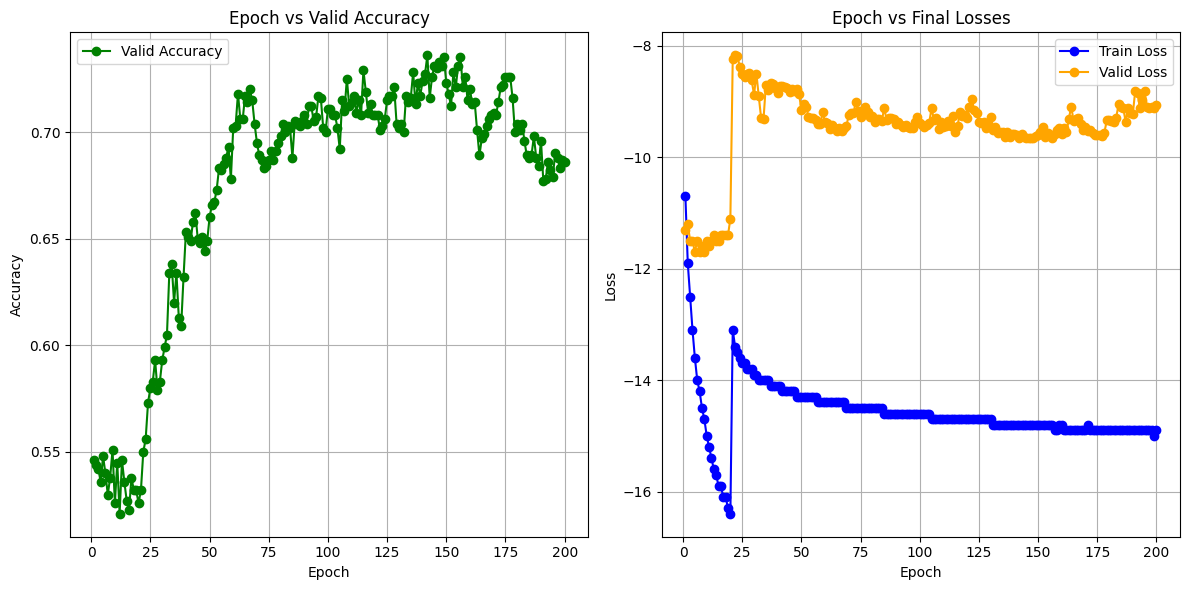

In [ ]:
from logging import NullHandler
import re
import matplotlib.pyplot as plt

# Initialize empty lists
epochs = []
valid_accuracies = []
train_losses = []
valid_losses = []
separate_loss = []
lang_loss = []

# Read and parse the log file
with open('/content/results/convtasnet/1234/train_log.txt', 'r') as file:
  epoch_match = None
  train_loss_match = None
  valid_loss_match = None
  acc_match = None
  for line in file:
      # Use regular expressions to extract values
      if(epoch_match == None):
        epoch_match = re.search(r'epoch: (\d+)', line)
      if(acc_match == None):
        acc_match = re.search(r'valid Accuracy Partial: ([\deE\+\-\.]+)', line)
      if(train_loss_match == None):
        train_loss_match = re.search(r'train final_loss: ([\deE\+\-\.]+)', line)
      if(valid_loss_match == None):
        valid_loss_match = re.search(r'valid final_loss: ([\deE\+\-\.]+)', line)
      # print(valid_loss_match)
      # separate_loss_match = re.search(r'valid separate_loss: ([\deE\+\-\.]+)', line)
      # lang_loss_match = re.search(r'valid lang_loss: ([\deE\+\-\.]+)', line)

      if epoch_match and train_loss_match and valid_loss_match :
          epochs.append(int(epoch_match.group(1)))
          valid_accuracies.append(float(acc_match.group(1)))
          train_losses.append(float(train_loss_match.group(1)))
          valid_losses.append(float(valid_loss_match.group(1)))
          epoch_match = None
          train_loss_match = None
          valid_loss_match = None

          acc_match = None

print(train_losses)
print(valid_losses)
print(valid_accuracies)
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, valid_accuracies, marker='o', label='Valid Accuracy', color='green')
plt.title("Epoch vs Valid Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, marker='o', label='Train Loss', color='blue')
plt.plot(epochs, valid_losses, marker='o', label='Valid Loss', color='orange')
# plt.plot(epochs, separate_loss, marker='o', label='Separate Loss', color='red')
# plt.plot(epochs, lang_loss, marker='o', label='Lang Loss', color='purple')
plt.title("Epoch vs Final Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Evaluate

In [ ]:
# Eval
separator.evaluate( test_data, min_key="si-snr")

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
separator.save_results(test_data)

End Run

In [ ]:
!rm -rf /content/results
# !cp -r /content/results /content/drive/MyDrive/Project/
# !cp -r /content/hparams/conVasNet.yml /content/drive/MyDrive/Project/results/

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
!cp /content/hparams/conVasNet_p.yml /content/drive/MyDrive/Project

In [ ]:
# import torch
# import torch.nn as nn
# # from speechbrain.nnet.losses import PitWrapper
# # pit_bceeee = PitWrapper(nn.NLLLoss(reduction ='none'))
# loss_1 = nn.CrossEntropyLoss(reduction = 'none')
# loss_2 = nn.CrossEntropyLoss(reduction='mean')
# n = 0
# while n!=100:
#   input = torch.randn(1,2, 16, requires_grad=True)
#   target = torch.empty(1,2,16, dtype=torch.long).random_(1)
#   target[0][1][5] = 1
#   target[0][0][8] = 1
#   input = input.squeeze(0)
#   target = target.squeeze(0)
#   targets = (target == 1).nonzero(as_tuple=False)
#   input_first, input_second = torch.chunk(input, chunks = 2, dim=0)
#   target_first, target_second = torch.chunk(targets, chunks = 2, dim=0)
#   target_first = target_first.squeeze(0)[1:]
#   target_second = target_second.squeeze(0)[1:]
#   # print(type(input_first),target_first,target_second)
#   lang_loss = 0.5*torch.min(torch.stack([(loss_1(input_first,target_first)+loss_1(input_second,target_second)), (loss_1(input_first,target_second)+loss_1(input_second,target_first))]))
#   # print(lang_loss)
#   target_2 = target.argmax(dim = 1)
#   # print(input,target_2,target_2.flip(0))
#   lang_loss_2 = torch.min(torch.stack([loss_2(input,target_2),loss_2(input,target_2.flip(0))]))
#   # print(lang_loss_2)
#   if(lang_loss != lang_loss_2):
#     print(f"Different for {input}")
#   n = n +1